## Exploratory Data Analysis Cab Companies

* The aim of this project is to perform EDA to support the Company XYZ to understand the Cab market before making an investment in one of the US Cab companies.

In [1]:
# Importing the libraries
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr

In [2]:
# Loading datasets
cab_data = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer = pd.read_csv("Customer_ID.csv")
transaction = pd.read_csv("Transaction_ID.csv")
holiday = pd.read_csv("US_Holidays_2016_2018.csv", sep=";")

In [3]:
# Visualizing the first rows of Cab dataset
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
# Visualizing the first rows of City dataset
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
# Visualizing the first rows of Customer dataset
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
# Visualizing the first rows of Transaction dataset
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
# Visualizing the first rows of Holiday dataset
holiday.head()

,Date,Holiday
0,1/18/2016,"Birthday of Martin Luther King, Jr."
1,2/15/2016,Washington's Birthday
2,5/30/2016,Memorial Day
3,7/4/2016,Independence Day
4,9/5/2016,Labor Day


In [8]:
# Checking details of each dataset for data intake report
print("\nCab_Data\n")
print("Total number of observations: {}".format(len(cab_data)))
print("Total number of features: {}".format(len(cab_data.columns)))
print("Number of duplicated registers: {}".format(sum(cab_data.duplicated())))
print("Data type of features:\n{}".format(cab_data.dtypes))

print("\nCity\n")
print("Total number of observations: {}".format(len(city)))
print("Total number of features: {}".format(len(city.columns)))
print("Number of duplicated registers: {}".format(sum(city.duplicated())))
print("Data type of features:\n{}".format(city.dtypes))

print("\nCustomer\n")
print("Total number of observations: {}".format(len(customer)))
print("Total number of features: {}".format(len(customer.columns)))
print("Number of duplicated registers: {}".format(sum(customer.duplicated())))
print("Data type of features:\n{}".format(customer.dtypes))

print("\nTransaction\n")
print("Total number of observations: {}".format(len(transaction)))
print("Total number of features: {}".format(len(transaction.columns)))
print("Number of duplicated registers: {}".format(sum(transaction.duplicated())))
print("Data type of features:\n{}".format(transaction.dtypes))

print("\nHoliday\n")
print("Total number of observations: {}".format(len(holiday)))
print("Total number of features: {}".format(len(holiday.columns)))
print("Number of duplicated registers: {}".format(sum(holiday.duplicated())))
print("Data type of features:\n{}".format(holiday.dtypes))


Cab_Data

Total number of observations: 359392
Total number of features: 7
Number of duplicated registers: 0
Data type of features:
Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

City

Total number of observations: 20
Total number of features: 3
Number of duplicated registers: 0
Data type of features:
City          object
Population    object
Users         object
dtype: object

Customer

Total number of observations: 49171
Total number of features: 4
Number of duplicated registers: 0
Data type of features:
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

Transaction

Total number of observations: 440098
Total number of features: 3
Number of duplicated registers: 0
Data type of features:
Transaction ID     int64
Customer ID        int64
Payment_Mode      obj

In [9]:
# Checking unique values for cab_data
for col in cab_data.columns:
    print(len(cab_data[col].unique()))

359392
1095
2
19
874
99176
16291


In [10]:
# Checking unique values for city
for col in city.columns:
    print(len(city[col].unique()))

20
20
20


In [11]:
# Checking unique values for customer
for col in customer.columns:
    print(len(customer[col].unique()))

49171
2
48
23341


In [12]:
# Checking unique values for transaction
for col in transaction.columns:
    print(len(transaction[col].unique()))

440098
49171
2


In [13]:
# Checking unique values for holiday
for col in holiday.columns:
    print(len(holiday[col].unique()))

29
10


### Features Dictionary

#### Dataset1 - cab_data
* Transaction ID - transaction identification (categorical variable)
* Date of Travel - number of days since (1899-12-30) (integer variable)
* Company - name of the company which did the trip (categorical variable)
* City - city names where each trip happened (categorical variable)
* KM Travelled - distance per trip (float variable)
* Price Charged - charged price per trip (float variable)
* Cost of Trip - the cost per trip (float variable)

#### Dataset2 - city
* City - city names (cateorical variable)
* Population - population per city (float variable)
* Users - number of users per city (float variable)

#### Dataset3 - customer
* Customer ID - customer identification (categorical variable)
* Gender - gender of the customer (categorical variable)
* Age - age of the customer (integer variable)
* Income (USD/Month) - income of customers (float variable)

#### Dataset4 - transaction
* Transaction ID - transaction identification (categorical variable)
* Customer ID - customer identification (categorical variable)
* Payment_Mode - method of payment (categorical variable)

#### Dataset5 - Holiday
* Date - the date of the holiday (categorical variable)
* Holiday - name of holiday (categorical variable)

#### Changing Data Types

In [14]:
# Changing the data type of dataset1 - cab_data
cab_data["Transaction ID"] = cab_data["Transaction ID"].astype(str)
cab_data["Date of Travel"] = cab_data["Date of Travel"].apply(lambda x: (dt.date(1899,12,30) + dt.timedelta(x)).strftime("%Y-%m-%d"))
cab_data["Date of Travel"] = cab_data["Date of Travel"].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').date())

In [15]:
# Changing the data type of dataset2 - city
city["Population"] = city["Population"].str.replace(",", "").astype(int)
city["Users"] = city["Users"].str.replace(",", "").astype(int)

In [16]:
# Changing the data type of dataset3 - customer
customer["Customer ID"] = customer["Customer ID"].astype(str)
customer["Income (USD/Month)"] = customer["Income (USD/Month)"].astype(float)

In [17]:
# Changing the data type of dataset4 - transaction
transaction["Transaction ID"] = transaction["Transaction ID"].astype(str)
transaction["Customer ID"] = transaction["Customer ID"].astype(str)

In [18]:
# Changing the data type of dataset5 - holiday
holiday["Date"] = holiday["Date"].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y').date())

## Descriptive Analysis (univariate analysis)
### Getting to know the datasets

#### Dataset1 - cab_data

In [19]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  object 
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), object(4)
memory usage: 19.2+ MB


The dataset1 contains 4 categorical and 3 numerical variables.

* Categorical Variables Analysis

In [20]:
# Checking unique values for Transaction ID
len(cab_data["Transaction ID"].unique())

359392

In [21]:
# Checking unique values for Date of Travel
len(cab_data["Date of Travel"].unique())

1095

In [22]:
# Value count for Date of Travel
dates_count = cab_data["Date of Travel"].value_counts()
dates_count

2018-01-05    2022
2017-12-15    1123
2017-12-08    1100
2018-12-15    1086
2017-11-24    1085
              ... 
2016-01-19      88
2016-01-12      86
2016-01-11      85
2016-01-05      47
2016-01-04      25
Name: Date of Travel, Length: 1095, dtype: int64

In [23]:
# Checking unique values for Company
len(cab_data["Company"].unique())

2

In [24]:
# Value count for Company
company_count = cab_data["Company"].value_counts()
company_count

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

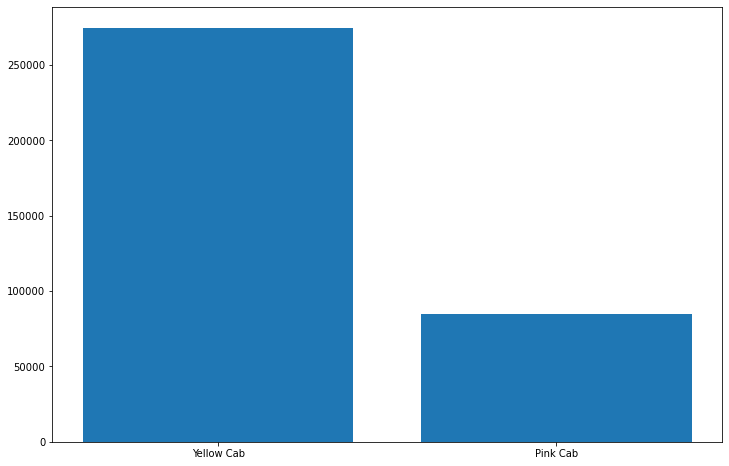

In [25]:
# Plotting the number of transactions per company
fig = plt.figure(figsize=[12,8])
plt.bar(company_count.index, company_count.values)
plt.show()

In [26]:
# Checking unique values for City
len(cab_data["City"].unique())

19

In [27]:
# Value count for City
city_count = cab_data["City"].value_counts()
city_count = city_count.sort_values()

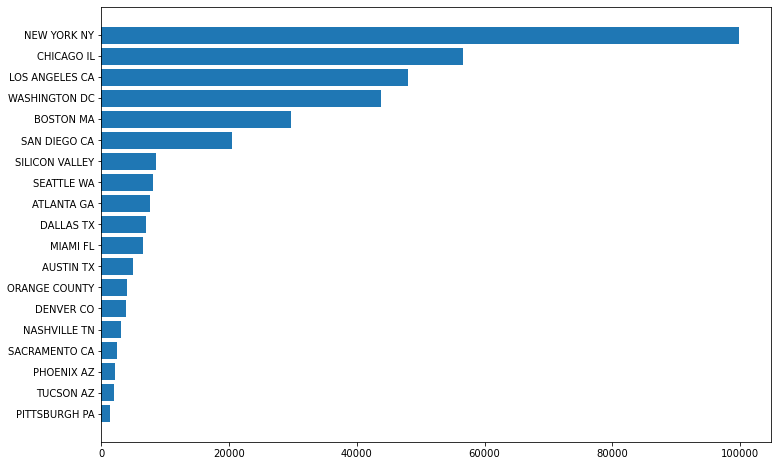

In [28]:
# Plotting the number of customer per city
fig = plt.figure(figsize=[12,8])
plt.barh(city_count.index, city_count.values)
plt.show()

* Numerical Variables Analysis

In [29]:
# Checking statistics for KM Travelled, Price Charged and Cost of Trip
cab_data.describe()

,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113
std,12.233526,274.378911,157.993661
min,1.900000,15.600000,19.000000
25%,12.000000,206.437500,151.200000
50%,22.440000,386.360000,282.480000
75%,32.960000,583.660000,413.683200
max,48.000000,2048.030000,691.200000


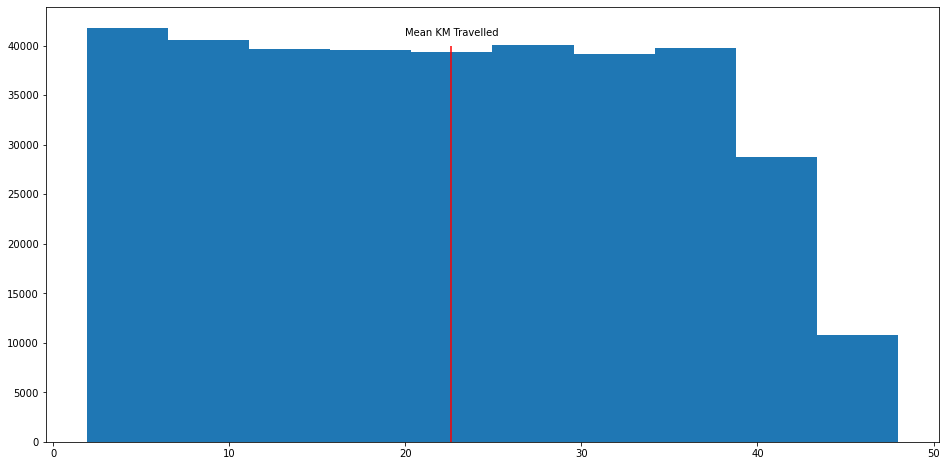

In [30]:
# Plotting the distribution for KM Travelled
fig = plt.figure(figsize=[16,8])
plt.hist(cab_data["KM Travelled"])
plt.vlines(x=cab_data["KM Travelled"].mean(), ymin=0, ymax=4e4, color="red")
plt.annotate("Mean KM Travelled", xy=(20, 4.1e4))
plt.show()

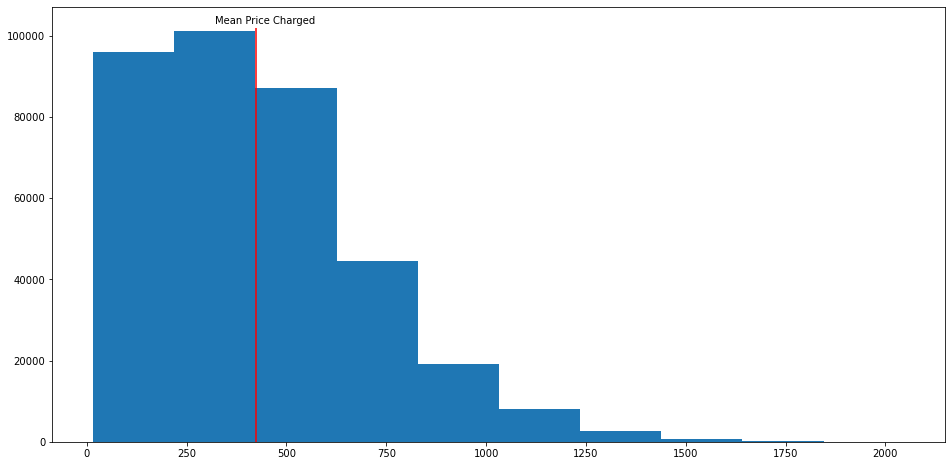

In [31]:
# Plotting the distribution for Price Charged
fig = plt.figure(figsize=[16,8])
plt.hist(cab_data["Price Charged"])
plt.vlines(x=cab_data["Price Charged"].mean(), ymin=0, ymax=1.02e5, color="red")
plt.annotate("Mean Price Charged", xy=(320, 1.03e5))
plt.show()

It seems that a few data points for the higher charged prices are outliers. Later on this section, let's build a few boxplots to help identifying which variables presents outliers.

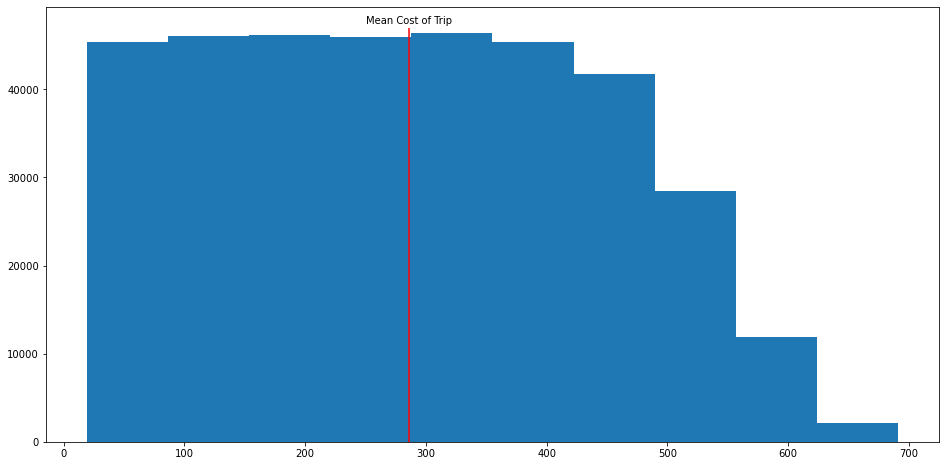

In [32]:
# Plotting the distribution for Cost of Trip
fig = plt.figure(figsize=[16,8])
plt.hist(cab_data["Cost of Trip"])
plt.vlines(x=cab_data["Cost of Trip"].mean(), ymin=0, ymax=4.7e4, color="red")
plt.annotate("Mean Cost of Trip", xy=(250, 4.75e4))
plt.show()

#### Dataset2 - city

In [33]:
# Checking the size, number of NA values and type of data for dataset2
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


There is 1 catergorical variable and 2 numeric variables

* Categorical Variable Analysis

In [34]:
# Checking unique values for City
len(city["City"].unique())

20

In [35]:
# Checking the unique city names
city["City"].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

From the dataset2, there are 20 unique cities.

* Numerical Variable Analysis

In [36]:
# Checking statistics for Population and Users
city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


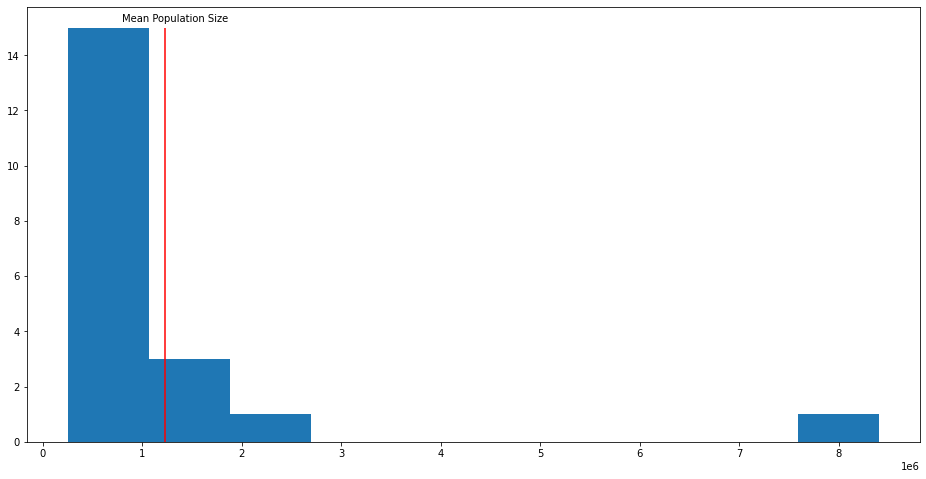

In [37]:
# Plotting the distribution for Population
fig = plt.figure(figsize=[16,8])
plt.hist(city["Population"])
plt.vlines(x=city["Population"].mean(), ymin=0, ymax=15, color="red")
plt.annotate("Mean Population Size", xy=(0.8e6, 15.2))
plt.show()

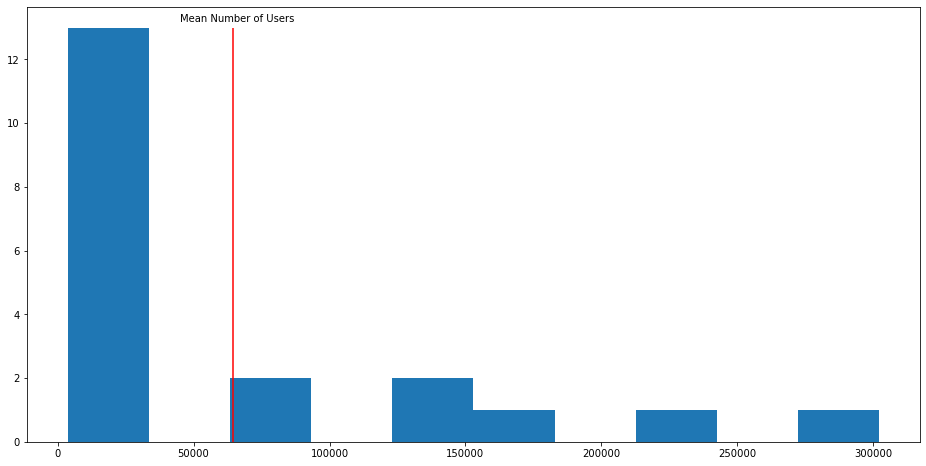

In [38]:
# Plotting the distribution for Users
fig = plt.figure(figsize=[16,8])
plt.hist(city["Users"])
plt.vlines(x=city["Users"].mean(), ymin=0, ymax=13, color="red")
plt.annotate("Mean Number of Users", xy=(45e3, 13.2))
plt.show()

From the above analysis, the mean size of population of the 20 cities listed in the dataset2 is approximately 1.23 million, however it ranges from approximately 0.25 to 8.5 millions. Most of cities presents a population lower than 1 million (15).

Regarding the number of users per city, most of cities presented less than 40,000, however the mean number of users was approximately 65,000, as there are few cities with much higher number of users compared to the majority of cities.

#### Dataset3 - customer

In [39]:
# Checking the size, number of NA values and type of data for dataset3
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         49171 non-null  object 
 1   Gender              49171 non-null  object 
 2   Age                 49171 non-null  int64  
 3   Income (USD/Month)  49171 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


There are 2 categorical variables and 2 numerical

* Categorical Variables Analysis

In [40]:
# Checking unique values for Customer ID
len(customer["Customer ID"].unique())

49171

In [41]:
# Checking unique values for Gender
len(customer["Gender"].unique())

2

In [42]:
# Value count for each Gender
gender_count = customer["Gender"].value_counts()
gender_count

Male      26562
Female    22609
Name: Gender, dtype: int64

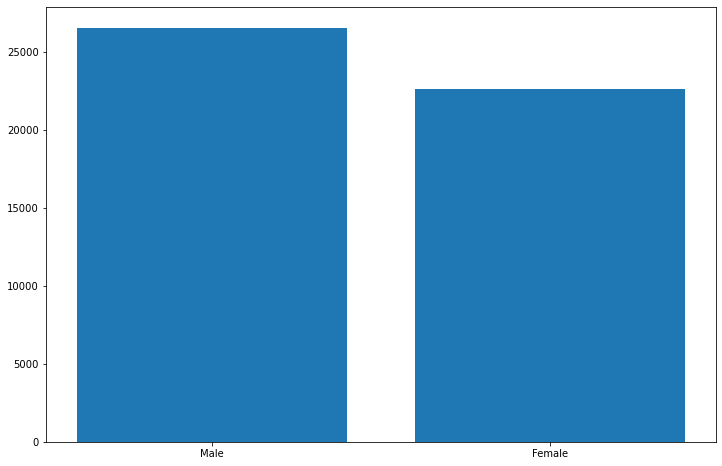

In [43]:
# Plotting the number of customer per gender
fig = plt.figure(figsize=[12,8])
plt.bar(gender_count.index, gender_count.values)
plt.show()

From the above analysis, there are 49171 unique values for the Customer ID. There were identified slightly higher number of male customers compared to female customers.

* Numerical Variable Analysis

In [44]:
# Checking statistics for Age and Income
customer.describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


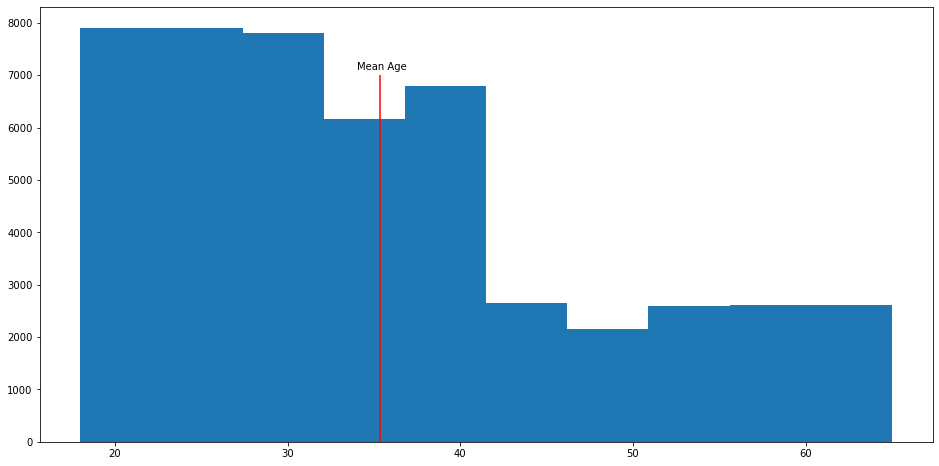

In [45]:
# Plotting the distribution for Age
fig = plt.figure(figsize=[16,8])
plt.hist(customer["Age"])
plt.vlines(x=customer["Age"].mean(), ymin=0, ymax=7000, color="red")
plt.annotate("Mean Age", xy=(34, 7100))
plt.show()

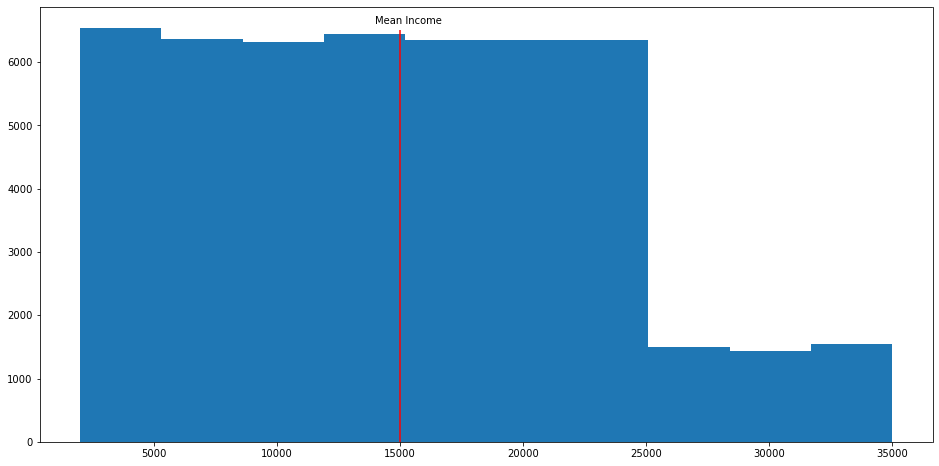

In [46]:
# Plotting the distribution for Income
fig = plt.figure(figsize=[16,8])
plt.hist(customer["Income (USD/Month)"])
plt.vlines(x=customer["Income (USD/Month)"].mean(), ymin=0, ymax=6500, color="red")
plt.annotate("Mean Income", xy=(14000, 6600))
plt.show()

From the above analysis, it is clear that most of customers are aged between 18 and 40, with a mean age of 35 years old. Moreover, the mean income for customers is approximately USD 15,000.00 per month. Moreover, most of customers presented an income varying from USD 2000 to 25000 per month.

#### Dataset4 - transaction

In [47]:
# Checking the size, number of NA values and type of data for dataset4
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  object
 1   Customer ID     440098 non-null  object
 2   Payment_Mode    440098 non-null  object
dtypes: object(3)
memory usage: 10.1+ MB


There are only categorical variables in this dataset.

In [48]:
# Checking unique values for Transaction ID
len(transaction["Transaction ID"].unique())

440098

In [49]:
# Checking unique values for Customer ID
len(transaction["Customer ID"].unique())

49171

In [50]:
# Value count for each Customer ID
customer_count = transaction['Customer ID'].value_counts()
customer_count.head()

494     54
2939    53
1070    51
2766    51
1628    50
Name: Customer ID, dtype: int64

In [51]:
# Checking unique values for Payment_Mode
len(transaction["Payment_Mode"].unique())

2

In [52]:
# Value count for each category of Payment_Mode
payment_counts = transaction["Payment_Mode"].value_counts()
payment_counts

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

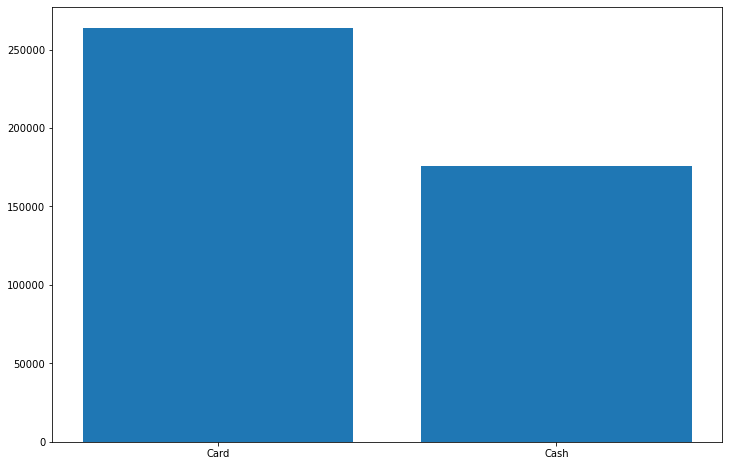

In [53]:
# Plotting the number of transactions per payment method
fig = plt.figure(figsize=[12,8])
plt.bar(payment_counts.index, payment_counts.values)
plt.show()

From the above analysis, there is no duplicated transaction ID (440098 transactions). For the customer ID, there were 49171 registers, which is the same as the number of Customer IDs identified in dataset3. The maximum number of transactions considering a single customer was 54.

There were also identified two methods of payment (card or cash), which most of them were performed by card (approximately 60%).

#### Dataset5 - holiday

In [54]:
# Checking the size, number of NA values and type of data for dataset5
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     29 non-null     object
 1   Holiday  29 non-null     object
dtypes: object(2)
memory usage: 592.0+ bytes


In [55]:
# Checking unique values for Holiday
len(holiday["Holiday"].unique())

10

In [56]:
# Checking the name of the holidays
holiday["Holiday"].unique()

array(['Birthday of Martin Luther King, Jr.', "Washington's Birthday",
       'Memorial Day', 'Independence Day', 'Labor Day', 'Columbus Day',
       'Veterans Day', 'Thanksgiving Day', 'Christmas Day',
       "New Year's Day"], dtype=object)

In [57]:
# Checking the city the appears in the City dataset but does not appear in the cab_data dataset
for c in list(city["City"].values):
    if c not in list(cab_data["City"].unique()):
        print(c)

SAN FRANCISCO CA


In [58]:
# Removing the city San Francisco from the City dataset, so that we can join the dataset1 and dataset2
city = city[city["City"] != "SAN FRANCISCO CA"].reset_index().drop(columns="index")

In [59]:
# Merging the dataset1 (cab_data) and dataset2 (city)
df1 = pd.merge(cab_data, city, on="City")
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701


In [60]:
# Chaning the col name of holiday dataset from Date to Date of Travel to merge the df1 and holiday
holiday.columns = ["Date of Travel", "Holiday"]
df1 = pd.merge(df1, holiday, on="Date of Travel", how="outer")
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Holiday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,NaN
1,10000397,2016-01-08,Yellow Cab,ATLANTA GA,18.90,609.50,267.624,814885,24701,NaN
2,10000025,2016-01-08,Pink Cab,BOSTON MA,25.52,360.79,298.584,248968,80021,NaN
3,10000028,2016-01-08,Pink Cab,BOSTON MA,34.22,498.02,407.218,248968,80021,NaN
4,10000419,2016-01-08,Yellow Cab,BOSTON MA,36.36,703.49,436.320,248968,80021,NaN


In [61]:
# Filling the NaN values with "No" (no holiday)
df1["Holiday"] = df1["Holiday"].fillna("No")
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Holiday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,No
1,10000397,2016-01-08,Yellow Cab,ATLANTA GA,18.90,609.50,267.624,814885,24701,No
2,10000025,2016-01-08,Pink Cab,BOSTON MA,25.52,360.79,298.584,248968,80021,No
3,10000028,2016-01-08,Pink Cab,BOSTON MA,34.22,498.02,407.218,248968,80021,No
4,10000419,2016-01-08,Yellow Cab,BOSTON MA,36.36,703.49,436.320,248968,80021,No


In [62]:
# Merging the dataset3 (customer) and dataset4 (transaction)
df2 = pd.merge(customer, transaction, on="Customer ID")
df2.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813.0,10000011,Card
1,29290,Male,28,10813.0,10351127,Cash
2,29290,Male,28,10813.0,10412921,Card
3,27703,Male,27,9237.0,10000012,Card
4,27703,Male,27,9237.0,10320494,Card


In [63]:
#Checking the number of unique transaction IDs in joined_df and joined_df2
print("Number of unique transaction IDs in the df1 dataset (based on cab_data dataset):", len(df1["Transaction ID"].unique()))
print("Number of unique transaction IDs in the df2 dataset (based on transaction dataset):", len(df2["Transaction ID"].unique()))

Number of unique transaction IDs in the df1 dataset (based on cab_data dataset): 359392
Number of unique transaction IDs in the df2 dataset (based on transaction dataset): 440098


There are more transactions in df2 (merge of customer and transaction tables) compared to df1 (merge of cab_data, city and holiday). Therefore it seems that we have more transactions that were not related to the service provided by the two cab companies being analysed.

In this case, we desconsidered the transactions that are not related to the Yellow and Pink cab companies and created a final dataset by merging df1 and df2, which was named final_df.

In [64]:
# Merging the df1 and df2
final_df = pd.merge(df1, df2, on="Transaction ID")
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Holiday,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,No,29290,Male,28,10813.0,Card
1,10000397,2016-01-08,Yellow Cab,ATLANTA GA,18.90,609.50,267.624,814885,24701,No,29009,Male,28,15771.0,Card
2,10000025,2016-01-08,Pink Cab,BOSTON MA,25.52,360.79,298.584,248968,80021,No,59372,Male,53,4912.0,Cash
3,10000028,2016-01-08,Pink Cab,BOSTON MA,34.22,498.02,407.218,248968,80021,No,58346,Male,27,21650.0,Cash
4,10000419,2016-01-08,Yellow Cab,BOSTON MA,36.36,703.49,436.320,248968,80021,No,57102,Male,32,17384.0,Card


In [65]:
# Cheking the feature names of the full dataset (final_df)
final_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Population', 'Users', 'Holiday',
       'Customer ID', 'Gender', 'Age', 'Income (USD/Month)', 'Payment_Mode'],
      dtype='object')

In [66]:
# Ordering the features in a better way
ordered_cols = ['Transaction ID', 'Date of Travel', 'Holiday', 'Company', 'KM Travelled',
                'Price Charged', 'Cost of Trip', 'City', 'Population', 'Users',
                'Customer ID', 'Gender', 'Age', 'Income (USD/Month)', 'Payment_Mode']
final_df = final_df[ordered_cols]
final_df.head()

,Transaction ID,Date of Travel,Holiday,Company,KM Travelled,Price Charged,Cost of Trip,City,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-08,No,Pink Cab,30.45,370.95,313.635,ATLANTA GA,814885,24701,29290,Male,28,10813.0,Card
1,10000397,2016-01-08,No,Yellow Cab,18.90,609.50,267.624,ATLANTA GA,814885,24701,29009,Male,28,15771.0,Card
2,10000025,2016-01-08,No,Pink Cab,25.52,360.79,298.584,BOSTON MA,248968,80021,59372,Male,53,4912.0,Cash
3,10000028,2016-01-08,No,Pink Cab,34.22,498.02,407.218,BOSTON MA,248968,80021,58346,Male,27,21650.0,Cash
4,10000419,2016-01-08,No,Yellow Cab,36.36,703.49,436.320,BOSTON MA,248968,80021,57102,Male,32,17384.0,Card


In [67]:
# Checking the size of the final_df
len(final_df)

359392

In [68]:
# Checking NA values in the final_df
final_df.isna().sum()

Transaction ID        0
Date of Travel        0
Holiday               0
Company               0
KM Travelled          0
Price Charged         0
Cost of Trip          0
City                  0
Population            0
Users                 0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Payment_Mode          0
dtype: int64

Now, all the data is compressed in a unique dataset. It is important to mention that the San Francisco city that was part of the city dataset is not part of this final dataset as there was no cab_data for this city. Moreover, it is important to mention that a few of the transactions presented in the transaction dataset are not part of the final dataset either because they were not related to the service provided by the Yellow and Pink cab companies.

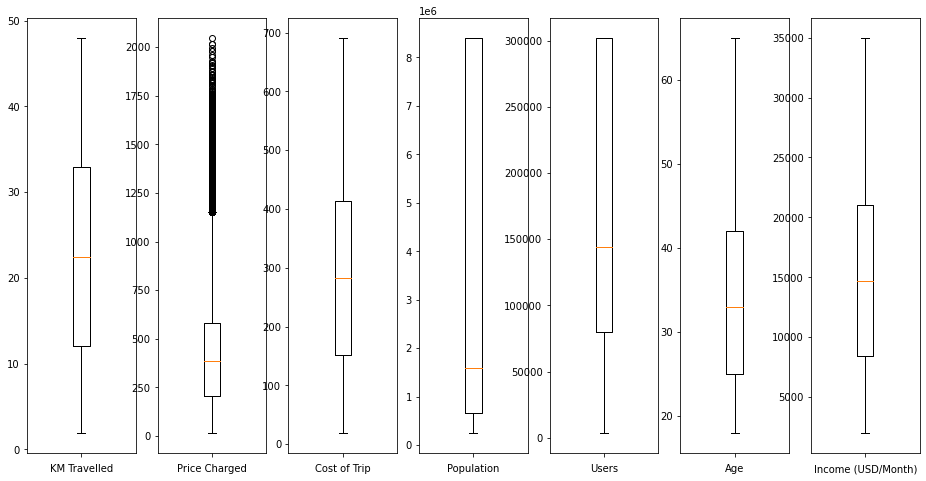

In [69]:
# Checking for outliers for all numeric variables
numeric_final_df = final_df[["KM Travelled", "Price Charged", "Cost of Trip", "Population", "Users", "Age", "Income (USD/Month)"]]

# Ploting boxplots for all numeric variables
fig = plt.figure(figsize=[16,8])

ax1 = plt.subplot(1,7,1)
ax1.boxplot(numeric_final_df["KM Travelled"])
ax1.set_xticklabels("")
ax1.set_xlabel("KM Travelled")

ax2 = plt.subplot(1,7,2)
ax2.boxplot(numeric_final_df["Price Charged"])
ax2.set_xticklabels("")
ax2.set_xlabel("Price Charged")

ax3 = plt.subplot(1,7,3)
ax3.boxplot(numeric_final_df["Cost of Trip"])
ax3.set_xticklabels("")
ax3.set_xlabel("Cost of Trip")

ax4 = plt.subplot(1,7,4)
ax4.boxplot(numeric_final_df["Population"])
ax4.set_xticklabels("")
ax4.set_xlabel("Population")

ax5 = plt.subplot(1,7,5)
ax5.boxplot(numeric_final_df["Users"])
ax5.set_xticklabels("")
ax5.set_xlabel("Users")

ax6 = plt.subplot(1,7,6)
ax6.boxplot(numeric_final_df["Age"])
ax6.set_xticklabels("")
ax6.set_xlabel("Age")

ax7 = plt.subplot(1,7,7)
ax7.boxplot(numeric_final_df["Income (USD/Month)"])
ax7.set_xticklabels("")
ax7.set_xlabel("Income (USD/Month)")

plt.show()

Now, it is clear that we only have outliers for the variable "Price Charged". However, as customers could have been charged well above the mean price, depending on the day, time and other unknown variables, these outliers were not removed from the dataset and we considered them in this analysis

In [70]:
# Saving the final_df
final_df.to_csv("final_df.csv", index=False)

## Exploratory Data Analysis - Part 2
### Getting to know a little bit more about the full dataset

#### Re-loading the full dataset and making necessary changes

In [71]:
# Loading the full dataset
df = pd.read_csv("final_df.csv")

In [72]:
# Checking the presence of NA values and data type for all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Holiday             359392 non-null  object 
 3   Company             359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   City                359392 non-null  object 
 8   Population          359392 non-null  int64  
 9   Users               359392 non-null  int64  
 10  Customer ID         359392 non-null  int64  
 11  Gender              359392 non-null  object 
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  float64
 14  Payment_Mode        359392 non-null  object 
dtypes: float64(4), int64(5), object(6)

In [73]:
# Changing data type of a few variables
df["Transaction ID"] = df["Transaction ID"].astype(str)
df["Date of Travel"] = pd.to_datetime(df["Date of Travel"])
df["Customer ID"] = df["Customer ID"].astype(str)

In [74]:
# Re-checking the data type of features
df.dtypes

Transaction ID                object
Date of Travel        datetime64[ns]
Holiday                       object
Company                       object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
City                          object
Population                     int64
Users                          int64
Customer ID                   object
Gender                        object
Age                            int64
Income (USD/Month)           float64
Payment_Mode                  object
dtype: object

#### Let's start by investigating a few points to get a better understanding of the dataset

* The proportion of the population that uses cab services per city (we have to keep in mind that this proportion might be related to other cab companies that provide the service in the cities)
* The total number of travels per company considering all evaluated years
* The total number of travels per company per city considering all evaluated years
* The total number of travels per company per customer's gender considering all evaluated years
* The mean travelled distance and the distribution of the travelled distance per company considering all evaluated years
* The mean customer's age and distribution of the customer's age that uses one or another cab service considering all evaluated years
* The mean income of customers and the distribution of customers that uses one or another cab service considering all evaluated years
* The number of transactions that were made using one or another payment method per company considering all evaluated years

* The mean number of travels per day during Holidays compared to non-holidays per company considering all evaluated years
* The mean price charged per travel during Holidays compared to non-holidays per company considering all evaluated years
* The mean profit (price charged - cost of trip) per travel per company considering all evaluated years
* The mean distance per travel per company considering all evaluated years

In [75]:
df.head()

,Transaction ID,Date of Travel,Holiday,Company,KM Travelled,Price Charged,Cost of Trip,City,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-08,No,Pink Cab,30.45,370.95,313.635,ATLANTA GA,814885,24701,29290,Male,28,10813.0,Card
1,10000397,2016-01-08,No,Yellow Cab,18.90,609.50,267.624,ATLANTA GA,814885,24701,29009,Male,28,15771.0,Card
2,10000025,2016-01-08,No,Pink Cab,25.52,360.79,298.584,BOSTON MA,248968,80021,59372,Male,53,4912.0,Cash
3,10000028,2016-01-08,No,Pink Cab,34.22,498.02,407.218,BOSTON MA,248968,80021,58346,Male,27,21650.0,Cash
4,10000419,2016-01-08,No,Yellow Cab,36.36,703.49,436.320,BOSTON MA,248968,80021,57102,Male,32,17384.0,Card


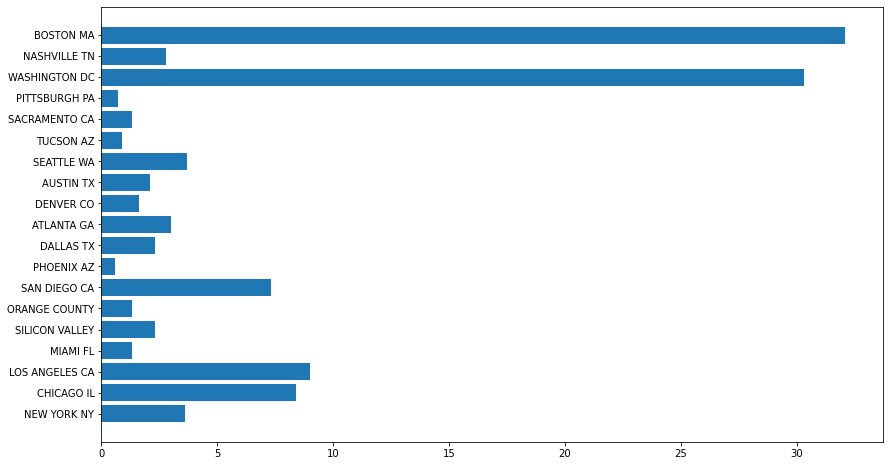

In [76]:
# The proportion of the population that uses cab services per city (we have to keep in mind that this proportion
# might be related to other cab companies that provide the service in the cities)
city["User_prop"] = round(city["Users"] / city["Population"] * 100,1)

# Plotting
fig = plt.figure(figsize=[14,8])

plt.barh(city["City"], city["User_prop"])

plt.show()

It is clear that Washington DC and Boston MA presented the highest number of proportion of users of cabs, followed by Los Angeles CA, Chicago IL and San Diego CA, which all account for more than 5% of the population that uses cabs.

In [77]:
# Creating a new feature named Profit considering the difference between the price charged and the cost of trip
df["Profit"] = df["Price Charged"] - df["Cost of Trip"]
df["User_prop"] = df["Users"] / df["Population"]

In [78]:
# The total number of travels per company considering all evaluated years
df.groupby("Company").count()["Transaction ID"]

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction ID, dtype: int64

There were about 3 times more travels for the Yellow Cab compared to the Pink Cab company, considering the all years (2016, 2017 and 2018).

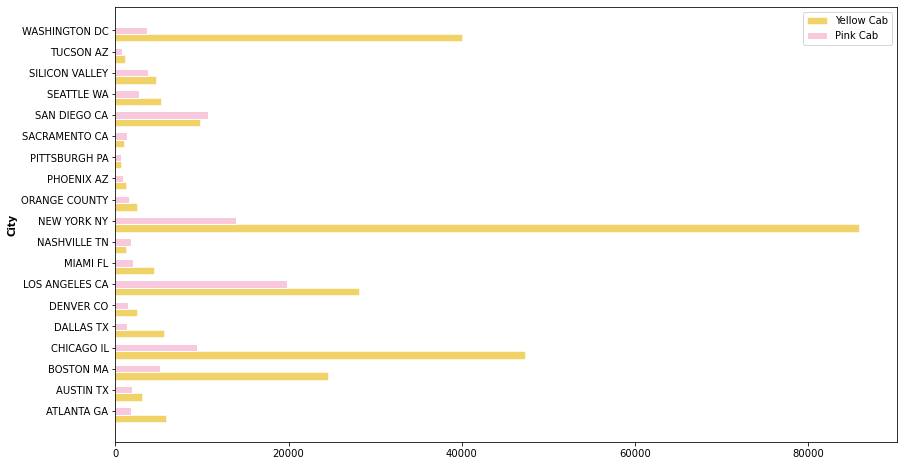

In [79]:
# The total number of travels per company per city considering all evaluated years
g1 = df.groupby(["Company", "City"]).count()["Transaction ID"].reset_index()

# Plotting
fig = plt.figure(figsize=[14,8])

barWidth = 0.35
 
bars1 = list(g1[g1["Company"] == "Yellow Cab"]["Transaction ID"])
bars2 = list(g1[g1["Company"] == "Pink Cab"]["Transaction ID"])
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.barh(r1, bars1, color='#E6B400', height=barWidth, edgecolor='white', label='Yellow Cab', alpha=0.6)
plt.barh(r2, bars2, color='#F8C8DC', height=barWidth, edgecolor='white', label='Pink Cab')
 
plt.ylabel('City', fontweight='bold')
plt.yticks([r + barWidth for r in range(len(bars1))], list(g1["City"].unique()))

plt.legend()
plt.show()

When comparing the number of travels per company per city, it was observed that the Yellow Cab company presented a higher number of travels in nearly all cities, with exception to 4 out of 19 cities, which include Nashville TN, Pittsburgh PA, Sacramento CA and San Diego CA.

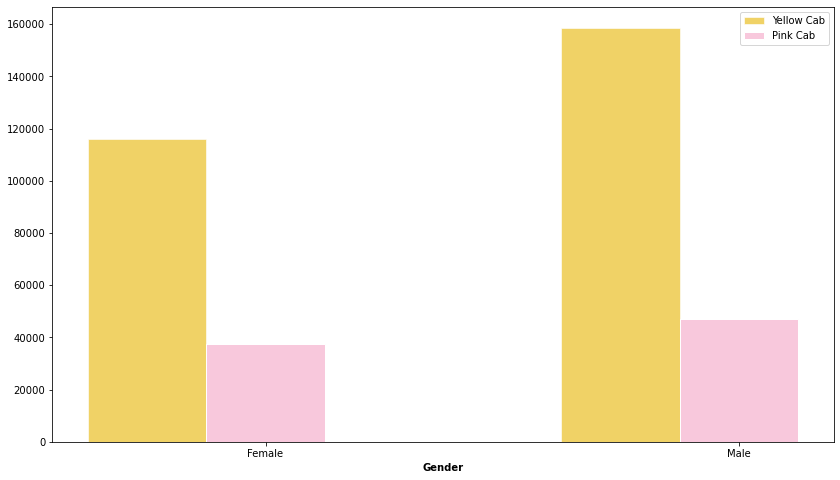

In [80]:
# The total number of travels per company per customer's gender considering all evaluated years
g2 = df.groupby(["Company", "Gender"]).count()["Transaction ID"].reset_index()

# Plotting
fig = plt.figure(figsize=[14,8])

barWidth = 0.25
 
bars1 = list(g2[g2["Company"] == "Yellow Cab"]["Transaction ID"])
bars2 = list(g2[g2["Company"] == "Pink Cab"]["Transaction ID"])
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='#E6B400', width=barWidth, edgecolor='white', label='Yellow Cab', alpha=0.6)
plt.bar(r2, bars2, color='#F8C8DC', width=barWidth, edgecolor='white', label='Pink Cab')
 
plt.xlabel('Gender', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], list(g2["Gender"].unique()))

plt.legend()
plt.show()

In [81]:
# The mean travelled distance and the distribution of the travelled distance per company considering all evaluated years
g3 = df.groupby(["Company"]).mean()["KM Travelled"].reset_index()
g3


,Company,KM Travelled
0,Pink Cab,22.559917
1,Yellow Cab,22.569517


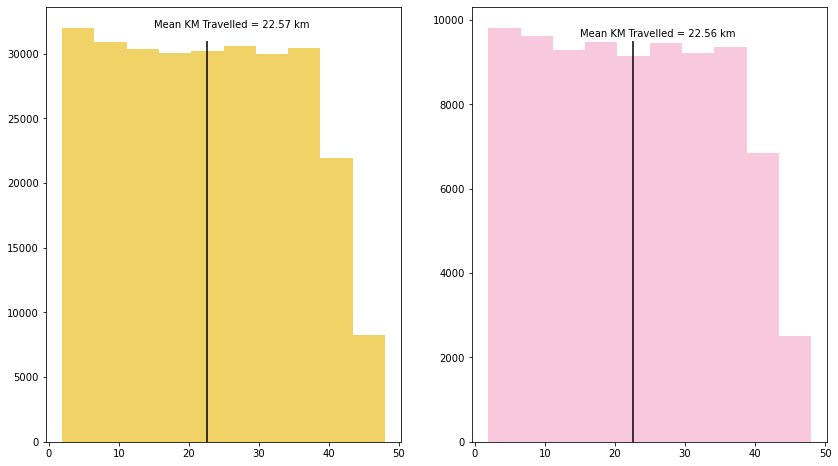

In [82]:
# Plotting
fig = plt.figure(figsize=[14,8])
 
hist1 = list(df[df["Company"] == "Yellow Cab"]["KM Travelled"])
hist2 = list(df[df["Company"] == "Pink Cab"]["KM Travelled"])

ax1 = plt.subplot(1,2,1)
ax1.hist(hist1, color='#E6B400', label='Yellow Cab', alpha=0.6)
ax1.vlines(x=df[df["Company"] == "Yellow Cab"]["KM Travelled"].mean(), ymin=0, ymax=3.1e4, color="black")
ax1.annotate("Mean KM Travelled = {} km".format(round(g3["KM Travelled"].iloc[1], 2)), xy=(15, 3.2e4))

ax2 = plt.subplot(1,2,2)
ax2.hist(hist2, color='#F8C8DC', label='Pink Cab')
ax2.vlines(x=df[df["Company"] == "Pink Cab"]["KM Travelled"].mean(), ymin=0, ymax=0.95e4, color="black")
ax2.annotate("Mean KM Travelled = {} km".format(round(g3["KM Travelled"].iloc[0], 2)), xy=(15, 0.96e4))

plt.show()

The distribution of the distance travelled by both companies as well as the mean are very similar when considering all the years evaluated (2016, 2017 and 2018)

In [83]:
# The mean customer's age and distribution of the customer's age that uses one or another cab service considering all evaluated years
g4 = df.groupby(["Company"]).mean()["Age"].reset_index()
g4

,Company,Age
0,Pink Cab,35.322414
1,Yellow Cab,35.341112


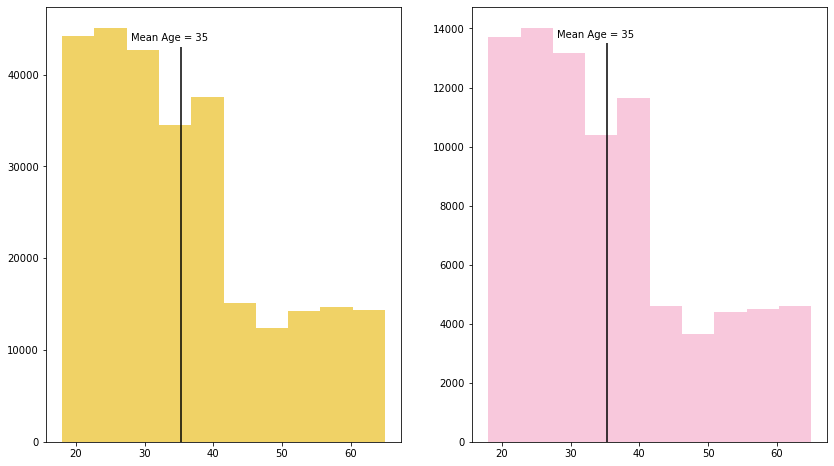

In [84]:
# Plotting
fig = plt.figure(figsize=[14,8])
 
hist1 = list(df[df["Company"] == "Yellow Cab"]["Age"])
hist2 = list(df[df["Company"] == "Pink Cab"]["Age"])

ax1 = plt.subplot(1,2,1)
ax1.hist(hist1, color='#E6B400', label='Yellow Cab', alpha=0.6)
ax1.vlines(x=df[df["Company"] == "Yellow Cab"]["Age"].mean(), ymin=0, ymax=4.3e4, color="black")
ax1.annotate("Mean Age = {}".format(round(g4["Age"].iloc[1])), xy=(28, 4.37e4))

ax2 = plt.subplot(1,2,2)
ax2.hist(hist2, color='#F8C8DC', label='Pink Cab')
ax2.vlines(x=df[df["Company"] == "Pink Cab"]["Age"].mean(), ymin=0, ymax=1.35e4, color="black")
ax2.annotate("Mean Age = {}".format(round(g4["Age"].iloc[0])), xy=(28, 1.37e4))

plt.show()

The distribution of the customer's age that uses both company services as well as the mean are very similar when considering all the years evaluated (2016, 2017 and 2018)

In [85]:
# The mean income of customers and the distribution of customers that uses one or another cab service considering all evaluated years
g5 = df.groupby(["Company"]).mean()["Income (USD/Month)"].reset_index()
g5

,Company,Income (USD/Month)
0,Pink Cab,15059.047137
1,Yellow Cab,15045.669817


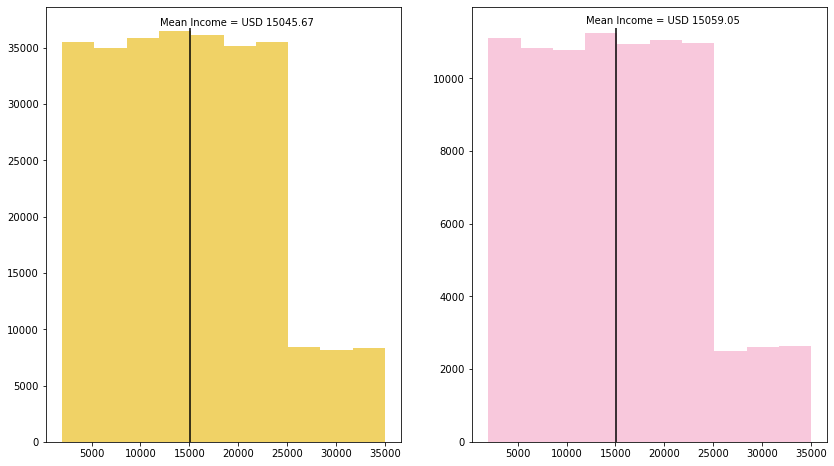

In [86]:
# Plotting
fig = plt.figure(figsize=[14,8])
 
hist1 = list(df[df["Company"] == "Yellow Cab"]["Income (USD/Month)"])
hist2 = list(df[df["Company"] == "Pink Cab"]["Income (USD/Month)"])

ax1 = plt.subplot(1,2,1)
ax1.hist(hist1, color='#E6B400', label='Yellow Cab', alpha=0.6)
ax1.vlines(x=df[df["Company"] == "Yellow Cab"]["Income (USD/Month)"].mean(), ymin=0, ymax=3.68e4, color="black")
ax1.annotate("Mean Income = USD {}".format(round(g5["Income (USD/Month)"].iloc[1], 2)), xy=(1.2e4, 3.70e4))

ax2 = plt.subplot(1,2,2)
ax2.hist(hist2, color='#F8C8DC', label='Pink Cab')
ax2.vlines(x=df[df["Company"] == "Pink Cab"]["Income (USD/Month)"].mean(), ymin=0, ymax=1.14e4, color="black")
ax2.annotate("Mean Income = USD {}".format(round(g5["Income (USD/Month)"].iloc[0], 2)), xy=(1.2e4, 1.15e4))

plt.show()

In [87]:
# The number of transactions that were made using one or another payment method per company considering all evaluated years
g6 = df.groupby(["Company", "Payment_Mode"]).count()["Transaction ID"].reset_index()
g6["Proportion"] = [
    round((g6["Transaction ID"].iloc[0] / sum(g6["Transaction ID"].iloc[0:2]) * 100), 1),
    round((g6["Transaction ID"].iloc[1] / sum(g6["Transaction ID"].iloc[0:2]) * 100), 1),
    round((g6["Transaction ID"].iloc[2] / sum(g6["Transaction ID"].iloc[2:4]) * 100), 1),
    round((g6["Transaction ID"].iloc[3] / sum(g6["Transaction ID"].iloc[2:4]) * 100), 1)
]
g6

,Company,Payment_Mode,Transaction ID,Proportion
0,Pink Cab,Card,50719,59.9
1,Pink Cab,Cash,33992,40.1
2,Yellow Cab,Card,164785,60.0
3,Yellow Cab,Cash,109896,40.0


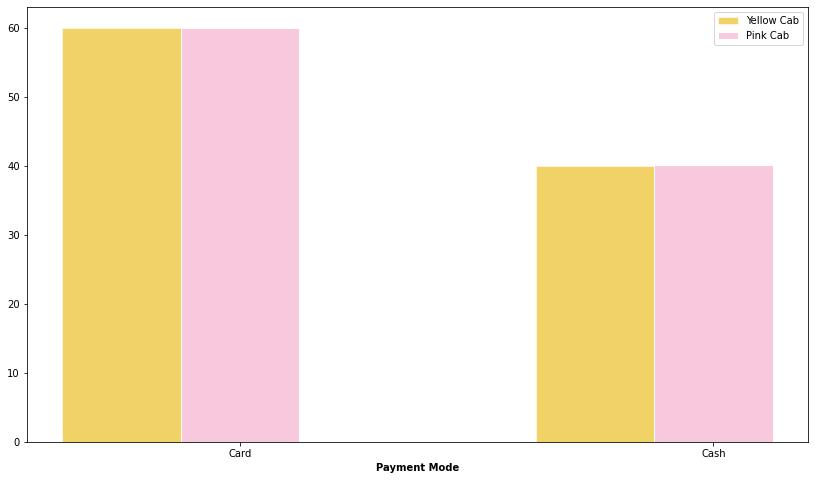

In [88]:
# Plotting
fig = plt.figure(figsize=[14,8])

barWidth = 0.25
 
bars1 = list(g6[g6["Company"] == "Yellow Cab"]["Proportion"])
bars2 = list(g6[g6["Company"] == "Pink Cab"]["Proportion"])
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='#E6B400', width=barWidth, edgecolor='white', label='Yellow Cab', alpha=0.6)
plt.bar(r2, bars2, color='#F8C8DC', width=barWidth, edgecolor='white', label='Pink Cab')
 
plt.xlabel('Payment Mode', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], list(g6["Payment_Mode"].unique()))

plt.legend()
plt.show()

Most of payments were done by card, but both companies presented very similar number of payments by card (60%) and cash (40%)

In [89]:
# The mean number of travels per day during Holidays compared to non-holidays per company considering all evaluated years
df_no_Hol = df[df["Holiday"] == "No"]
df_Hol = df[df["Holiday"] != "No"]

In [90]:
# Mean of travels per day for non-Holidays
df_no_Hol.groupby("Company").count()["Profit"] / (len(cab_data["Date of Travel"].unique()) - holiday.count()[0])

Company
Pink Cab       77.776735
Yellow Cab    252.737336
Name: Profit, dtype: float64

In [91]:
# Mean number of travels per day for Holidays
df_Hol.groupby("Company").count()["Profit"] / holiday.count()[0]

Company
Pink Cab       62.103448
Yellow Cab    181.482759
Name: Profit, dtype: float64

Both companies presented higher mean number of travels per day for non-holidays compared to holidays

In [92]:
# The mean price charged per travel during Holidays compared to non-holidays per company considering all evaluated years

In [93]:
# Mean price charged per travel for non-Holidays
df_no_Hol.groupby("Company").mean()["Price Charged"]

Company
Pink Cab      310.679486
Yellow Cab    458.574277
Name: Price Charged, dtype: float64

In [94]:
# Mean price charged per travel for Holidays
df_Hol.groupby("Company").mean()["Price Charged"]

Company
Pink Cab      316.388207
Yellow Cab    438.100462
Name: Price Charged, dtype: float64

According to the previously analysis, for both holidays and non-holidays, the Yellow Cab charges a higher mean price, however, it could be related to the fact that this company makes not only more travels, but with higher distances.

Moreover, it was observed that the Yellow company has a lower charged price for holidays compared to non-holidays, whereas the Pink cab company presents a higher charged price for holidays compared to non-holidays.

In [95]:
# The mean profit (price charged - cost of trip) per travel per company considering all evaluated years
df.groupby("Company").mean()["Profit"]

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64

In general, the mean profit per travel for the Yellow Cab is higher compared to the Pink Cab, however, as mentioned above it could be associated with the fact that the Yellow Cab performs longer distance travels compared to the Pink Cab. Let's check the mean distance per travel for both companies next.

In [96]:
# The mean distance per travel per company considering all evaluated years
df.groupby("Company").mean()["KM Travelled"]

Company
Pink Cab      22.559917
Yellow Cab    22.569517
Name: KM Travelled, dtype: float64

In fact, the mean distance per travel for both companies are nearly the same, and therefore, the Yellow Company is making a higher profit compared to the Pink Company. Let's do some further analysis to confirm this information.

#### Now that we have a better understanding of the Dataset, let's perform a bit of feature engineering to select the features that we will perform the exploratory analysis to form the final analysis before modelling

## Exploratory Data Analysis - part 3
#### Now, the analysis will be foccused on helping the customer to find the best company to invest in

In [97]:
# Removing the features population and users from the dataset
df = df[["Transaction ID", "Date of Travel", "Holiday", "Company", "KM Travelled", "Price Charged", "Cost of Trip",
         "Profit", "City", "User_prop", "Customer ID", "Gender", "Age", "Income (USD/Month)", "Payment_Mode"]]

#### Let's answer a few questions to support our client to decide which company is better to invest

* Is there a correlation between the travel distance, the price charged, cost of trip and profit?
* Is there any difference on the profit per distance for the companies assessed?
* What are the top 5 cities that most contribute for the profit of the companies?
* How many transaction have happened for the Yellow and Pink cab companies in the years 2016, 2017 and 2018?
* How much profit the Yellow and Pink cab companies made in the years 2016, 2017 and 2018?
* Is there a correlation between users income and the total amount spend with cab?
* Which days of the week are more rides for both companies?
* Which days of the week are more profitable for both companies?
* What is the monthly mean number of travels per company?
* What is the monthly profit for both companies?
* What is the yearly profit for both companies?
* What are the attributes of these customer segments?
* Is there any seasonality in number of customers using the cab service?
* Do customers present fiedelity to one or another company or they use both companies in general?

#### Is there a correlation between the travel distance, the price charged, cost of trip and profit?

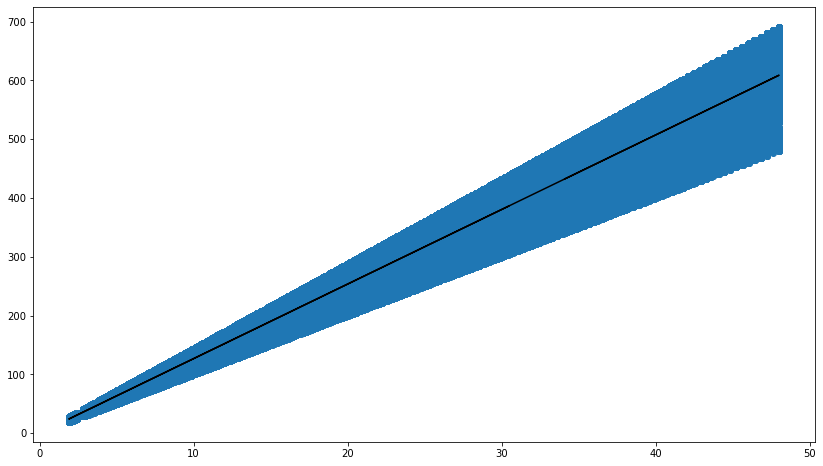

In [98]:
# Ploting a scatterplot to visualize the correlation between distance and cost of trip
fig = plt.figure(figsize=[14,8])
plt.scatter(df["KM Travelled"], df["Cost of Trip"])

m, b = np.polyfit(df["KM Travelled"], df["Cost of Trip"], 1)
plt.plot(df["KM Travelled"], m*df["KM Travelled"]+b, color="black")

plt.show()

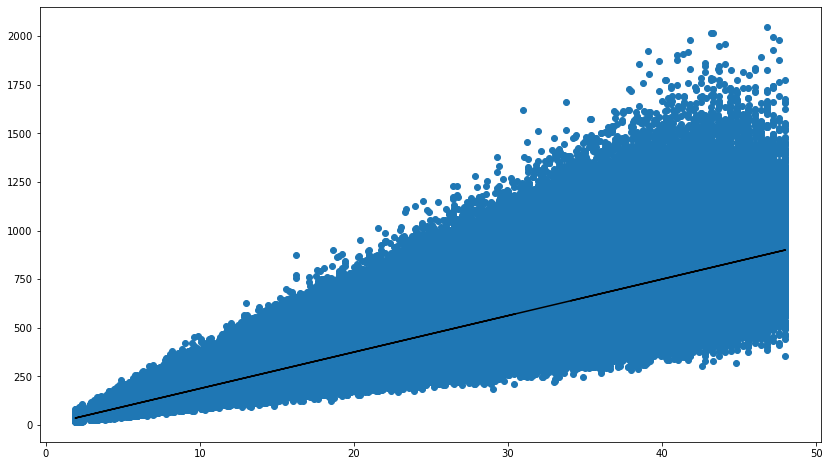

In [99]:
# Ploting a scatterplot to visualize the correlation between distance and price charged
fig = plt.figure(figsize=[14,8])
plt.scatter(df["KM Travelled"], df["Price Charged"], )

m, b = np.polyfit(df["KM Travelled"], df["Price Charged"], 1)
plt.plot(df["KM Travelled"], m*df["KM Travelled"]+b, color="black")

plt.show()

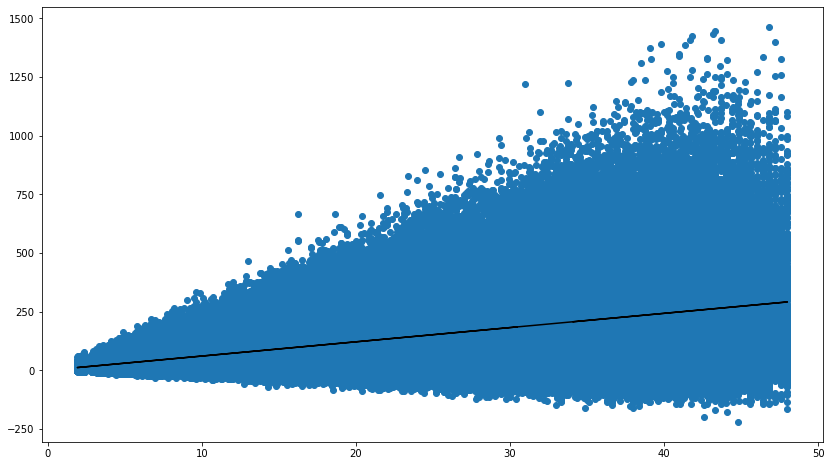

In [100]:
# Ploting a scatterplot to visualize the correlation between distance and profit
fig = plt.figure(figsize=[14,8])
plt.scatter(df["KM Travelled"], df["Profit"], )

m, b = np.polyfit(df["KM Travelled"], df["Profit"], 1)
plt.plot(df["KM Travelled"], m*df["KM Travelled"]+b, color="black")

plt.show()

<AxesSubplot:>

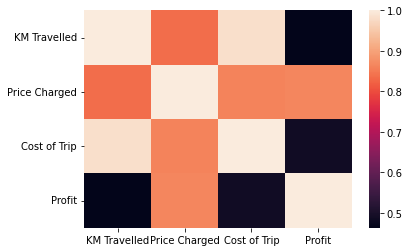

In [101]:
# Calculating the correlation among the variables "KM Travelled", "Price Charged", "Cost of Trip", "Profit"
corr1 = df[["KM Travelled", "Price Charged", "Cost of Trip", "Profit"]].corr()

# Ploting the correlation between 
sns.heatmap(corr1)

In [102]:
#calculation correlation coefficient and p-value between distance and cost of trip
pearsonr(df["KM Travelled"], df["Cost of Trip"])

(0.9818483823189953, 0.0)

In [103]:
#calculation correlation coefficient and p-value between distance and charged price
pearsonr(df["KM Travelled"], df["Price Charged"])

(0.8357531580209399, 0.0)

In [104]:
#calculation correlation coefficient and p-value between distance and profit
pearsonr(df["KM Travelled"], df["Profit"])

(0.4627681978971104, 0.0)

According the the previous analysis, it is clear that the distance travelled has a very strong positive correlation (0.98, p-value = 0) with the cost of trip, meaning that the longest the travel distance is, the higher the cost of the trip is.
Moreover, there is a strong correlation between the distance travelled (0.84, p-value = 0) and the price charged, although this correlation is slightly weaker compared to the previous one.
Finally, there is a moderate to weak correlation between the distance travelled and the profit (margin) (0.46, p-value = 0). This might have been caused because some travels may not be profitable due to some reason.

In [105]:
# Checking the variable profit to better understand the proportion of profitable travels
total_trips_per_company = df.groupby("Company").count()["Profit"]
profit_trips_per_company = df[df["Profit"] > 0].groupby("Company").count()["Profit"]
unprofit_trips_per_company = df[df["Profit"] <= 0].groupby("Company").count()["Profit"]

In [106]:
# Proportion of profitable and non-profitable trips for both companies
print ("Proportion of profitable rides for both companies: {}".format(round(profit_trips_per_company/total_trips_per_company*100,1)))
print ("Proportion of non-profitable rides for both companies: {}".format(round(unprofit_trips_per_company/total_trips_per_company*100,1)))


Proportion of profitable rides for both companies: Company
Pink Cab      86.9
Yellow Cab    95.0
Name: Profit, dtype: float64
Proportion of non-profitable rides for both companies: Company
Pink Cab      13.1
Yellow Cab     5.0
Name: Profit, dtype: float64


As previously shown, the Yellow Cab company (95%) seems to present a higher number of profitable rides compared to the Pink Cab company (87%). Let's re-do the correlation between the distance travelled and the profit for each company separately.

In [107]:
#calculation correlation coefficient and p-value between distance and profit for Pink Cab
pearsonr(df[df["Company"] == "Pink Cab"]["KM Travelled"], df[df["Company"] == "Pink Cab"]["Profit"])

(0.44263250048084624, 0.0)

In [108]:
#calculation correlation coefficient and p-value between distance and profit for Pink Cab
pearsonr(df[df["Company"] == "Yellow Cab"]["KM Travelled"], df[df["Company"] == "Yellow Cab"]["Profit"])

(0.5031522082950751, 0.0)

As suspected, there is a stronger correlation (but still moderate-weak) between the distance travelled and profit for the Yellow Cab (0.50) compared to the PinK Cab company (0.44)

In [109]:
# Now, let's check if there is any difference in the profit made by both companies considering different cities
total_trips_per_company_city = df.groupby(["Company", "City"]).count()["Profit"]
profit_trips_per_company_city = df[df["Profit"] > 0].groupby(["Company", "City"]).count()["Profit"]
profit_trips_per_company_city_prop = round(profit_trips_per_company_city/total_trips_per_company_city*100,1).reset_index()

In [110]:
# Proportion of profitable trips for both companies considering different cities
print ("Proportion of profitable rides for both companies for different cities: {}".format(profit_trips_per_company_city_prop))


Proportion of profitable rides for both companies for different cities:        Company            City  Profit
0     Pink Cab      ATLANTA GA    84.3
1     Pink Cab       AUSTIN TX    92.0
2     Pink Cab       BOSTON MA    85.8
3     Pink Cab      CHICAGO IL    76.4
4     Pink Cab       DALLAS TX    60.8
5     Pink Cab       DENVER CO    66.4
6     Pink Cab  LOS ANGELES CA    88.1
7     Pink Cab        MIAMI FL    86.4
8     Pink Cab    NASHVILLE TN    70.1
9     Pink Cab     NEW YORK NY    96.7
10    Pink Cab   ORANGE COUNTY    89.0
11    Pink Cab      PHOENIX AZ    74.7
12    Pink Cab   PITTSBURGH PA    60.6
13    Pink Cab   SACRAMENTO CA    76.9
14    Pink Cab    SAN DIEGO CA    91.4
15    Pink Cab      SEATTLE WA    79.0
16    Pink Cab  SILICON VALLEY    96.9
17    Pink Cab       TUCSON AZ    86.5
18    Pink Cab   WASHINGTON DC    88.4
19  Yellow Cab      ATLANTA GA    98.5
20  Yellow Cab       AUSTIN TX    97.0
21  Yellow Cab       BOSTON MA    87.7
22  Yellow Cab      CHICAGO IL 

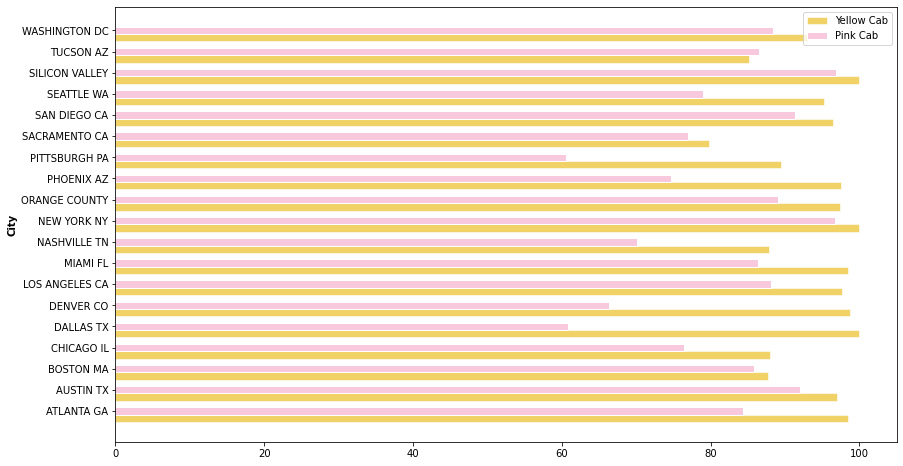

In [111]:
# Plotting the proportion of profitable trips for both companies considering different cities
fig = plt.figure(figsize=[14,8])

barWidth = 0.35
 
bars1 = list(profit_trips_per_company_city_prop[profit_trips_per_company_city_prop["Company"] == "Yellow Cab"]["Profit"])
bars2 = list(profit_trips_per_company_city_prop[profit_trips_per_company_city_prop["Company"] == "Pink Cab"]["Profit"])
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.barh(r1, bars1, color='#E6B400', height=barWidth, edgecolor='white', label='Yellow Cab', alpha=0.6)
plt.barh(r2, bars2, color='#F8C8DC', height=barWidth, edgecolor='white', label='Pink Cab')
 
plt.ylabel('City', fontweight='bold')
plt.yticks([r + barWidth for r in range(len(bars1))], list(profit_trips_per_company_city_prop["City"].unique()))

plt.legend()
plt.show()

According to the analysis shown above, it was observed the the Yellow cab presented a higher proportion of profitable rides compared to the Pink cab company for all cities, with exception to 1 city (Tucson AZ)

#### Is there any difference on the profit per distance for the companies assessed?

In [112]:
# Creating a new feature "Profit_dist" (profit per distance) and calculating the profit per km for both companies
df["Profit_dist"] = df["Profit"] / df["KM Travelled"]
df.groupby("Company").mean()["Profit_dist"]

Company
Pink Cab      2.769908
Yellow Cab    7.105508
Name: Profit_dist, dtype: float64

In [113]:
# Let's perform a hypothesis test to check if there is significant difference between the profit per
# distance for the Yellow and Pink Cab companies

# H0: There is no significant difference between the profit per KM for the Yellow and Pink cab companies
# H1: There is significant difference bewteen the profit per KM for the Yellow and Pink cab companies
# Adopted significance level: 0.05

from scipy import stats
from scipy.stats import ttest_ind

sample1 = df[df["Company"] == "Pink Cab"]["Profit_dist"]
sample2 = df[df["Company"] == "Yellow Cab"]["Profit_dist"]

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -210.96861574553898
P-Value:  0.0


According to the statistical test presented above, the profit per KM for the Yellow cab was significantly higher than the profit per KM for the Pink cab, considering a significance level of 0.05.

#### What are the top 5 cities that most contribute for the profit of the companies?

In [114]:
# total profit per company considering all years
total_profit_per_company = df.groupby("Company").sum()["Profit"]
total_profit_per_company

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64

In [115]:
# total profit per company per city considering all years
total_profit_per_company_city = df.groupby(["Company", "City"]).sum()["Profit"].reset_index()

In [116]:
# proportion of the total profit per city for the pink and yellow cab companies
total_profit_pink_per_city_prop = round(total_profit_per_company_city[total_profit_per_company_city["Company"] == "Pink Cab"]["Profit"] / total_profit_per_company[0] * 100,1)
total_profit_yellow_per_city_prop = round(total_profit_per_company_city[total_profit_per_company_city["Company"] == "Yellow Cab"]["Profit"] / total_profit_per_company[1] * 100,1)

In [117]:
# Selecting the top 5 cities according to the proportion of profit related to the total profit
top5_cities_pink_profit = total_profit_pink_per_city_prop.sort_values(ascending=False)[:5]
top5_cities_yellow_profit = total_profit_yellow_per_city_prop.sort_values(ascending=False)[:5]

In [118]:
# Top 5 cities that provided highest profits for the Pink cab company
print(top5_cities_pink_profit)
print(total_profit_per_company_city["City"].iloc[list(top5_cities_pink_profit.index)])

9     28.5
6     21.2
14    12.0
16     6.4
3      6.0
Name: Profit, dtype: float64
9        NEW YORK NY
6     LOS ANGELES CA
14      SAN DIEGO CA
16    SILICON VALLEY
3         CHICAGO IL
Name: City, dtype: object


In [119]:
# Top 5 cities that provided highest profits for the Yellow cab company
print(top5_cities_yellow_profit)
print(total_profit_per_company_city["City"].iloc[list(top5_cities_yellow_profit.index)])

28    60.1
25     7.5
37     7.5
22     7.0
21     3.4
Name: Profit, dtype: float64
28       NEW YORK NY
25    LOS ANGELES CA
37     WASHINGTON DC
22        CHICAGO IL
21         BOSTON MA
Name: City, dtype: object


According to the analysis shown above (considering the years 2016, 2017 and 2018), for the yellow cab company, most of its profit came from New York NY (60%), followed by Los Angeles CA, Washington DC, and Chicago IL (about 7% for each). Boston MA provided about 3.5% of the companies profit.

On the other hand, the pink cab company presented the highest profits for the cities New York NY (28.5%), Los Angeles CA (21.2%), San Diego CA (12%), Silicon Valley (6.4%), Chicago IL (6%). The top 5 cities (region) were responsible for about 74% of the total profit for the years 2016, 2017, 2018.

#### How many transaction have happened for the Yellow and Pink cab companies in the years 2016, 2017 and 2018?

In [120]:
# Creating 4 new features with the year, month, day and day of week for each date in the dataset
df['year'] = pd.DatetimeIndex(df['Date of Travel']).year
df['month'] = pd.DatetimeIndex(df['Date of Travel']).month
df['day'] = pd.DatetimeIndex(df['Date of Travel']).day
df['day_of_week'] = df['Date of Travel'].dt.day_name()

In [121]:
# Grouping the data by company and year and calculating the number of transactions per company per year
total_rides_company_year = df.groupby(["Company", "year"]).count()["Transaction ID"].reset_index()
total_rides_company_year

,Company,year,Transaction ID
0,Pink Cab,2016,25080
1,Pink Cab,2017,30321
2,Pink Cab,2018,29310
3,Yellow Cab,2016,82239
4,Yellow Cab,2017,98189
5,Yellow Cab,2018,94253


#### How much profit the Yellow and Pink cab companies made in the years 2016, 2017 and 2018?

In [122]:
# Grouping the data by company and year and calculating the total profit per company per year
total_profit_company_year = df.groupby(["Company", "year"]).sum()["Profit"].reset_index()
total_profit_company_year

,Company,year,Profit
0,Pink Cab,2016,1.713511e+06
1,Pink Cab,2017,2.033655e+06
2,Pink Cab,2018,1.560162e+06
3,Yellow Cab,2016,1.392700e+07
4,Yellow Cab,2017,1.657598e+07
5,Yellow Cab,2018,1.351740e+07


In [123]:
# Merging the previous created dataframes and renaming the columns
total_profit_per_ride_company_year = total_rides_company_year.merge(total_profit_company_year, on=["Company", "year"])
total_profit_per_ride_company_year.columns = ["Company", "year", "Number_of_rides", "Profit"]

#### Profit per ride for the Yellow and Pink cab companies made in the years 2016, 2017 and 2018?

In [124]:
# Calculating the profit per ride for both companies considering the years 2016, 2017, 2018
total_profit_per_ride_company_year["Profit_per_ride"] = total_profit_per_ride_company_year["Profit"] / total_profit_per_ride_company_year["Number_of_rides"]
total_profit_per_ride_company_year

,Company,year,Number_of_rides,Profit,Profit_per_ride
0,Pink Cab,2016,25080,1.713511e+06,68.321819
1,Pink Cab,2017,30321,2.033655e+06,67.070839
2,Pink Cab,2018,29310,1.560162e+06,53.229689
3,Yellow Cab,2016,82239,1.392700e+07,169.347821
4,Yellow Cab,2017,98189,1.657598e+07,168.817057
5,Yellow Cab,2018,94253,1.351740e+07,143.416122


According to the previous analysis, it is clear that both companies increased their profit from 2016 to 2017, however there was a decrease from 2017 to 2018, reaching a lower profit amount in 2018 compared to 2016 as well.

#### Is there a correlation between users income and the total amount spend with cab?

In [125]:
df.columns

Index(['Transaction ID', 'Date of Travel', 'Holiday', 'Company',
       'KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'City',
       'User_prop', 'Customer ID', 'Gender', 'Age', 'Income (USD/Month)',
       'Payment_Mode', 'Profit_dist', 'year', 'month', 'day', 'day_of_week'],
      dtype='object')

In [126]:
# Calculating customer income and customer total spend with cab
customer_income = df.groupby("Customer ID").mean()[["Income (USD/Month)"]]
customer_total_spend = df.groupby("Customer ID").sum()[["Price Charged"]]

In [127]:
customer_income["Income (USD/Month)"]

Customer ID
1        16359.0
10       12768.0
100      15913.0
1000     24953.0
10000    12592.0
          ...   
9994     32961.0
9996     21618.0
9997      5371.0
9998      7634.0
9999     19950.0
Name: Income (USD/Month), Length: 46148, dtype: float64

In [128]:
customer_total_spend["Price Charged"]

Customer ID
1        17490.13
10       12907.73
100      23595.49
1000     16894.92
10000      963.07
           ...   
9994       778.05
9996      1589.24
9997       930.09
9998      1494.41
9999       412.90
Name: Price Charged, Length: 46148, dtype: float64

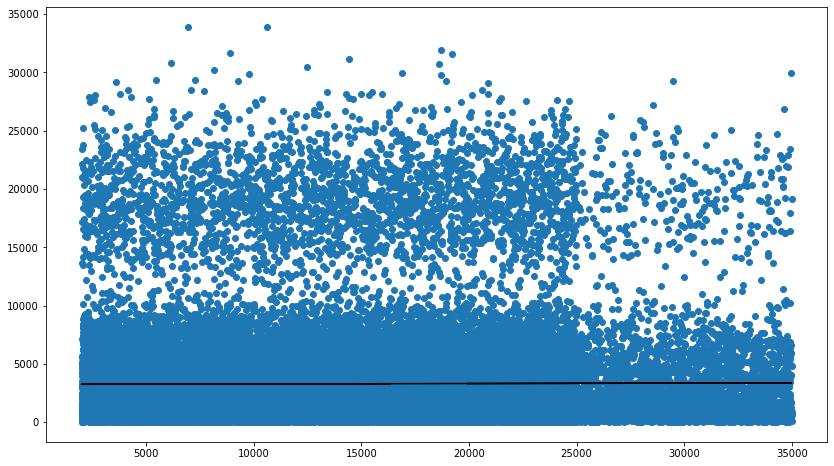

In [129]:
# Ploting a scatterplot to visualize the correlation between user's income and total amount spend
fig = plt.figure(figsize=[14,8])
plt.scatter(customer_income["Income (USD/Month)"], customer_total_spend["Price Charged"])

m, b = np.polyfit(customer_income["Income (USD/Month)"], customer_total_spend["Price Charged"], 1)
plt.plot(customer_income["Income (USD/Month)"].values, m*customer_income["Income (USD/Month)"]+b, color="black")

plt.show()

In [130]:
# calculation correlation coefficient and p-value between distance and cost of trip
pearsonr(customer_income["Income (USD/Month)"], customer_total_spend["Price Charged"])

(0.005799635532300993, 0.21281601900560698)

According to the scatter plot and the hypothesis test, there is no correlation between the customer's income and the total amount spend per customer.

#### Which days of the week are more rides for both companies?

In [131]:
# Creating a new dataframe for the number of rides per weekday with the grouped company
df_weekday = df.groupby(["Company", "day_of_week"]).count()["day"].reset_index()

In [132]:
# Creating a new column to help ordering the weekdays from Monday to Sunday and ordering the dataframe accordingly
df_weekday["order"] = [5,1,6,7,4,2,3,12,8,13,14,11,9,10]
df_weekday = df_weekday.sort_values("order")

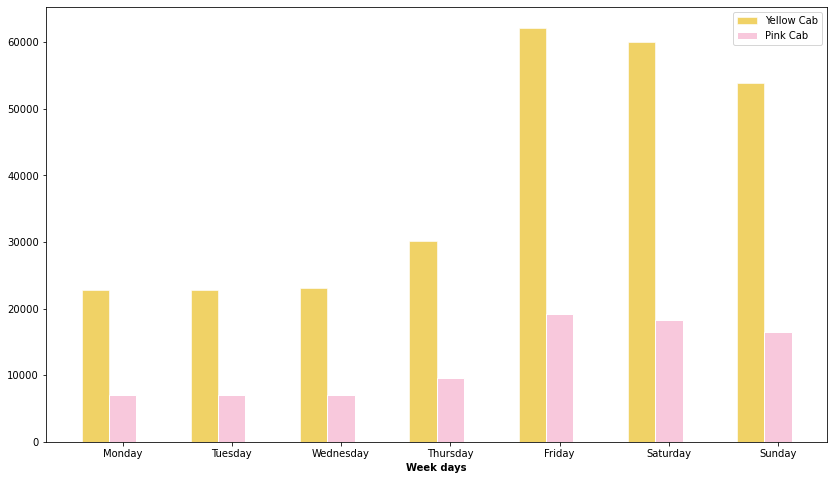

In [133]:
# Plotting the number of rides per week days starting from Monday to Sunday
fig = plt.figure(figsize=[14,8])

barWidth = 0.25
 
bars1 = list(df_weekday[df_weekday["Company"] == "Yellow Cab"]["day"])
bars2 = list(df_weekday[df_weekday["Company"] == "Pink Cab"]["day"])
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='#E6B400', width=barWidth, edgecolor='white', label='Yellow Cab', alpha=0.6)
plt.bar(r2, bars2, color='#F8C8DC', width=barWidth, edgecolor='white', label='Pink Cab')
 
plt.xlabel('Week days', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], list(df_weekday[df_weekday["Company"] == "Pink Cab"]["day_of_week"]))

plt.legend()
plt.show()

#### Which days of the week are more profitable for both companies?

In [134]:
# Creating a new dataframe for the profit per weekday with the grouped company
total_profit_weekdays = df.groupby(["Company", "day_of_week"]).sum()[["Profit"]].reset_index()

In [135]:
# Creating a new column to help ordering the weekdays from Monday to Sunday and ordering the dataframe accordingly
total_profit_weekdays["order"] = [5,1,6,7,4,2,3,12,8,13,14,11,9,10]
total_profit_weekdays = total_profit_weekdays.sort_values("order")

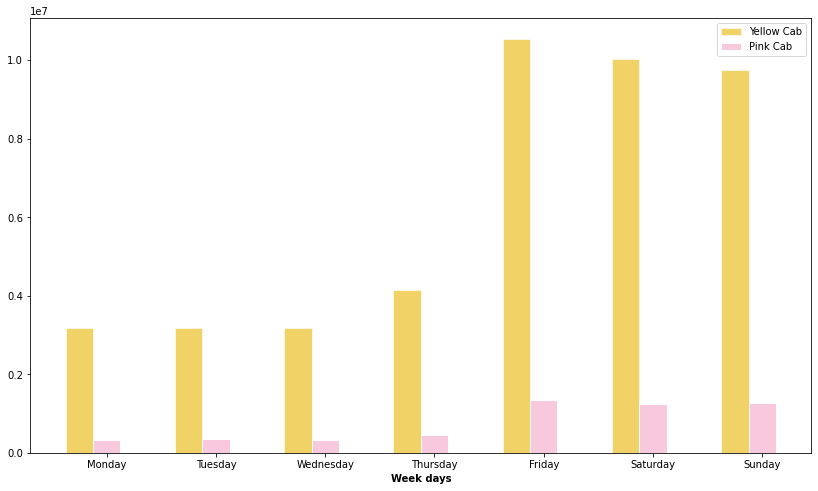

In [136]:
# Plotting the profit per week days starting from Monday to Sunday
fig = plt.figure(figsize=[14,8])

barWidth = 0.25
 
bars1 = list(total_profit_weekdays[total_profit_weekdays["Company"] == "Yellow Cab"]["Profit"])
bars2 = list(total_profit_weekdays[total_profit_weekdays["Company"] == "Pink Cab"]["Profit"])
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='#E6B400', width=barWidth, edgecolor='white', label='Yellow Cab', alpha=0.6)
plt.bar(r2, bars2, color='#F8C8DC', width=barWidth, edgecolor='white', label='Pink Cab')
 
plt.xlabel('Week days', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], list(total_profit_weekdays[total_profit_weekdays["Company"] == "Pink Cab"]["day_of_week"]))

plt.legend()
plt.show()

In both analysis carried out above, a similar pattern was presented for the number of rides and the profit made by each company during the weekdays along the years 2016, 2017, 2018.Most of the trips happened at Friday, followed by Saturday and Sunday for both companies. However, the Yellow Cab company did much more rides than the Pink Cab, and therefore, the profit for the Yellow Cab company was much higher than the Pink Cab profit as well.

#### What is the monthly mean number of travels per company?

In [212]:
number_trips_per_month[number_trips_per_month["Company"] == "Pink Cab"]["day"].max()

11568

In [137]:
# Creatingn a dataframe for the number of trips per month
number_trips_per_month = df.groupby(["Company", "month"]).count()[["day"]].reset_index()

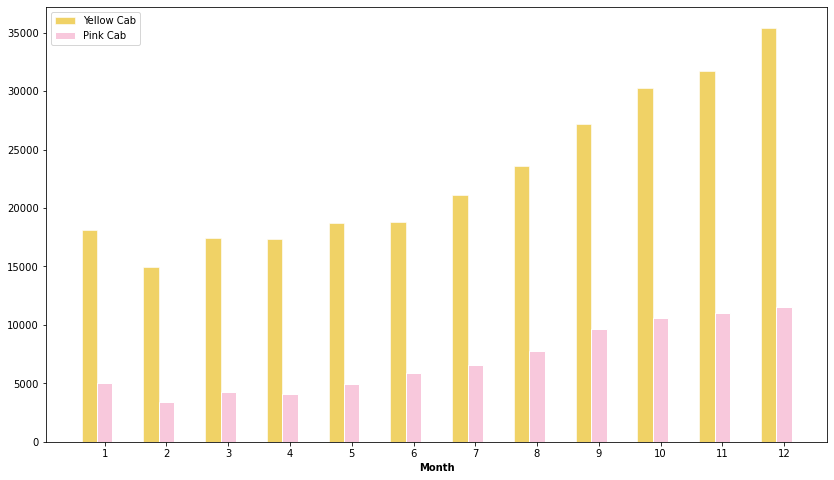

In [138]:
# Plotting the number of rides per month
fig = plt.figure(figsize=[14,8])

barWidth = 0.25
 
bars1 = list(number_trips_per_month[number_trips_per_month["Company"] == "Yellow Cab"]["day"])
bars2 = list(number_trips_per_month[number_trips_per_month["Company"] == "Pink Cab"]["day"])
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='#E6B400', width=barWidth, edgecolor='white', label='Yellow Cab', alpha=0.6)
plt.bar(r2, bars2, color='#F8C8DC', width=barWidth, edgecolor='white', label='Pink Cab')
 
plt.xlabel('Month', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], list(number_trips_per_month[number_trips_per_month["Company"] == "Pink Cab"]["month"]))

plt.legend()
plt.show()

The graph above shows that most of the rides happened in the last months of the year for both companies with an increase in the number of rides from July to December. The number of rides for the Yellow Cab company was always much higher compared to the Pink Cab.

#### What is the monthly profit for both companies?

In [139]:
# Creatingn a dataframe for the total profit per month
total_profit_per_month = df.groupby(["Company", "month"]).sum()[["Profit"]].reset_index()

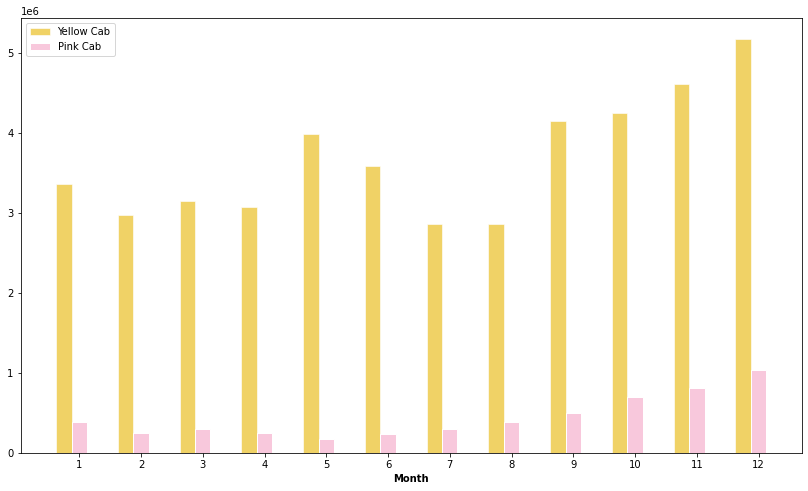

In [140]:
# Plotting the profit per month for both companies
fig = plt.figure(figsize=[14,8])

barWidth = 0.25
 
bars1 = list(total_profit_per_month[total_profit_per_month["Company"] == "Yellow Cab"]["Profit"])
bars2 = list(total_profit_per_month[total_profit_per_month["Company"] == "Pink Cab"]["Profit"])
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='#E6B400', width=barWidth, edgecolor='white', label='Yellow Cab', alpha=0.6)
plt.bar(r2, bars2, color='#F8C8DC', width=barWidth, edgecolor='white', label='Pink Cab')
 
plt.xlabel('Month', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], list(total_profit_per_month[total_profit_per_month["Company"] == "Pink Cab"]["month"]))

plt.legend()
plt.show()

Although the pattern of the number of rides did not exactly reflected the profit pather for these companies, it is clear that in the last months of the year, the profit of these companies were much higher compared to other months, especially for the Pink Cab company. The Yellow cab presented a very high profit in the months of May and June, and in fact, the Yellow Cab kept a good average in all the months throught the year.

#### What is the yearly profit for both companies?

In [141]:
# Creating a new dataframe for the total annual profit for both companies
total_profit_annual = df.groupby(["Company", "year"]).sum()["Profit"].reset_index()

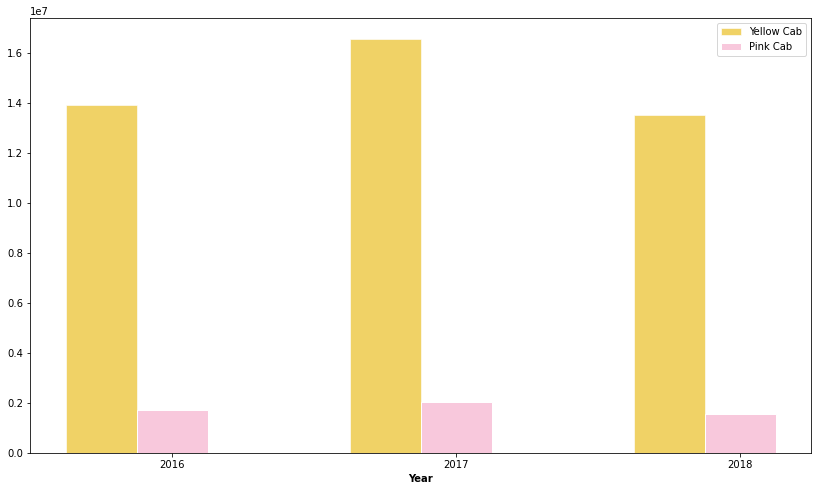

In [142]:
# Plotting the profit per month for both companies
fig = plt.figure(figsize=[14,8])

barWidth = 0.25
 
bars1 = list(total_profit_annual[total_profit_annual["Company"] == "Yellow Cab"]["Profit"])
bars2 = list(total_profit_annual[total_profit_annual["Company"] == "Pink Cab"]["Profit"])
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='#E6B400', width=barWidth, edgecolor='white', label='Yellow Cab', alpha=0.6)
plt.bar(r2, bars2, color='#F8C8DC', width=barWidth, edgecolor='white', label='Pink Cab')
 
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], list(total_profit_annual[total_profit_annual["Company"] == "Pink Cab"]["year"]))

plt.legend()
plt.show()

In the yearly analysis, it was observed that the profit increased from 2016 to 2017 for both companies, but it decreased from 2017 to 2018.

#### What are the attributes of these customer segments?

In [143]:
# Creating a new dataframe to hold only the customers attributes and remove duplicates
customers_att = df[["Customer ID", "Gender", "Age", "Income (USD/Month)"]]
customers_att = customers_att[customers_att.duplicated() == False].reset_index()
customers_att.head()

,index,Customer ID,Gender,Age,Income (USD/Month)
0,0,29290,Male,28,10813.0
1,1,29009,Male,28,15771.0
2,2,59372,Male,53,4912.0
3,3,58346,Male,27,21650.0
4,4,57102,Male,32,17384.0


In [144]:
# Counting the number of male and female customers
customers_att.groupby("Gender").count()[["Customer ID"]].reset_index()

,Gender,Customer ID
0,Female,21473
1,Male,24675


In [145]:
# Calculating the mean age for both genders
customers_att.groupby("Gender").mean()[["Age"]].reset_index()

,Gender,Age
0,Female,35.290551
1,Male,35.417629


In [146]:
# checking the max and min for the ages of customers
print("Minimum age:", customers_att["Age"].min())
print("Maximum age:", customers_att["Age"].max())

Minimum age: 18
Maximum age: 65


In [147]:
# Creating a categorical variable for different ranges of age
customers_att["Age_groups"] = 0
for i in range(len(customers_att["Age"])):
    if customers_att["Age"].iloc[i] >= 18 and customers_att["Age"].iloc[i] <= 25:
        customers_att["Age_groups"].iloc[i] = "18-25"
    elif customers_att["Age"].iloc[i] > 25 and customers_att["Age"].iloc[i] <= 35:
        customers_att["Age_groups"].iloc[i] = "26-35"
    elif customers_att["Age"].iloc[i] > 35 and customers_att["Age"].iloc[i] <= 45:
        customers_att["Age_groups"].iloc[i] = "36-45"
    elif customers_att["Age"].iloc[i] > 45 and customers_att["Age"].iloc[i] <= 55:
        customers_att["Age_groups"].iloc[i] = "46-55"
    elif customers_att["Age"].iloc[i] > 55:
        customers_att["Age_groups"].iloc[i] = "56-65"

/var/folders/58/kj5bg3yx2rx5gs82k21jmk180000gn/T/ipykernel_64703/3033151277.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_att["Age_groups"].iloc[i] = "26-35"


In [148]:
# Creating a new data-set for the groups of age
plot_data_age_group = customers_att.groupby("Age_groups").count()["Age"]

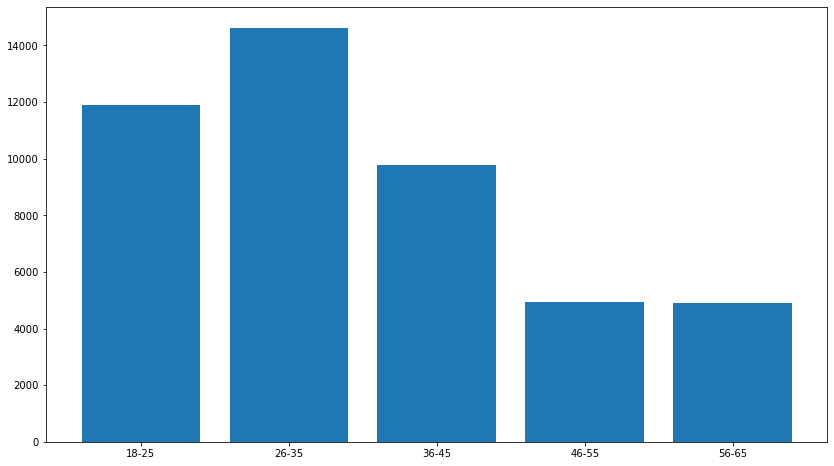

In [149]:
# Ploting the age_group variable
fig = plt.figure(figsize=[14,8])

plt.bar(plot_data_age_group.index, plot_data_age_group.values)
plt.show()

In [150]:
# Calculating the mean income for both genders
customers_att.groupby("Gender").mean()[["Income (USD/Month)"]].reset_index()

,Gender,Income (USD/Month)
0,Female,14956.258138
1,Male,15034.070355


In [151]:
# Checking the min and max for the customers' income
print("Minimum income:", customers_att["Income (USD/Month)"].min())
print("Maximum income:", customers_att["Income (USD/Month)"].max())

Minimum income: 2000.0
Maximum income: 35000.0


In [152]:
# Creating a categorical variable for different ranges of income
customers_att["Income_groups"] = 0
for i in range(len(customers_att["Income (USD/Month)"])):
    if customers_att["Income (USD/Month)"].iloc[i] >= 2000 and customers_att["Income (USD/Month)"].iloc[i] <= 7000:
        customers_att["Income_groups"].iloc[i] = "2,000-7,000"
    elif customers_att["Income (USD/Month)"].iloc[i] > 7000 and customers_att["Income (USD/Month)"].iloc[i] <= 12000:
        customers_att["Income_groups"].iloc[i] = "7,001-12,000"
    elif customers_att["Income (USD/Month)"].iloc[i] > 12000 and customers_att["Income (USD/Month)"].iloc[i] <= 17000:
        customers_att["Income_groups"].iloc[i] = "12,001-17,000"
    elif customers_att["Income (USD/Month)"].iloc[i] > 17000 and customers_att["Income (USD/Month)"].iloc[i] <= 22000:
        customers_att["Income_groups"].iloc[i] = "17,001-22,000"
    elif customers_att["Income (USD/Month)"].iloc[i] > 22000 and customers_att["Income (USD/Month)"].iloc[i] <= 27000:
        customers_att["Income_groups"].iloc[i] = "22,001-27,000"
    elif customers_att["Income (USD/Month)"].iloc[i] > 27000:
        customers_att["Income_groups"].iloc[i] = "27,001-35,000"

/var/folders/58/kj5bg3yx2rx5gs82k21jmk180000gn/T/ipykernel_64703/3209475143.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_att["Income_groups"].iloc[i] = "7,001-12,000"


In [153]:
# Creating a new dataframe for the groups of income and ordering it
plot_data_income_group = customers_att.groupby("Income_groups").count()[["Age"]]
plot_data_income_group["order"] = [3, 4, 1, 5, 6, 2]
plot_data_income_group = plot_data_income_group.sort_values("order")

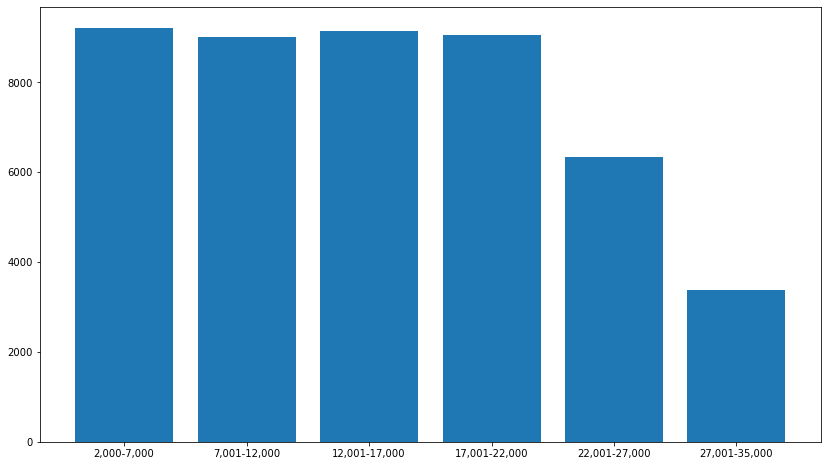

In [154]:
# Ploting the income_group variable
fig = plt.figure(figsize=[14,8])

plt.bar(plot_data_income_group.index, plot_data_income_group["Age"])
plt.show()

As presented in the analysis above, there are slightly higher number of customers that belongs to the male gender compared to the female. Moreover, it was also observed that the mean age and the mean income for both gender seem to be very similar, not showing any visual difference.

In general (not considering gender differences), most of customers were aged between 18 and 45, with a slightly higher amount of customers in the age range between 26 and 35. With respect to the income, it was not observed a visual difference for all customers that presented an income between USD 2,000 to 22,000 per month. However, there is a decrease in the number of customers with an income higher than USD 22,000 per month, and even less customers with income higher than USD 27,000 per month.

#### Is there any seasonality in number of customers using the cab service?

This question was answered in previous analysis, where we checked the seasonality of transactions per month, year and day of week.

#### Do customers present loyality to one or another company or they use both companies in general?

In [155]:
Unique_customers_ride = df.groupby("Customer ID").count()[["Transaction ID"]]

In [156]:
len(Unique_customers_ride)

46148

In [157]:
sum(Unique_customers_ride["Transaction ID"] < 2)

11442

In [158]:
sum(Unique_customers_ride["Transaction ID"] > 1)

34706

11,442 (approximately 25%) customers out of 46,148 had only 1 ride, whereas 34,706 customers had more than a ride. Now, let's check if how many customers has been loyal to one or another company among the customers with more than 2 rides

In [159]:
a = df[["Company", "Customer ID", "Transaction ID"]].groupby(["Company", "Customer ID"]).count().reset_index()

In [160]:
len(a["Customer ID"].unique())

46148

In [161]:
b = a[a["Company"] == "Pink Cab"][["Customer ID"]]
c = a[a["Company"] == "Yellow Cab"][["Customer ID"]]

d = b["Customer ID"].unique()
e = c["Customer ID"].unique()

In [162]:
count = 0
for i in e:
    if i in d:
        count += 1

In [163]:
print("Number of customers that used both services (Pink and Yellow Cab):", count)
print("Number of customers that only used the Pink Cab service:", len(d)-count)
print("Number of customers that only used the Yellow Cab service:", len(e)-count)

Number of customers that used both services (Pink and Yellow Cab): 26078
Number of customers that only used the Pink Cab service: 6252
Number of customers that only used the Yellow Cab service: 13818


In [164]:
len(d)-count + len(e)-count + count

46148

From 34,706 customers that had at least 2 rides, 26,078 used both services (approximately 75%), whereas the remaining 8,628 customers were loyal to one or another company

## Hyphotesis Test

#### Test1 - Is there any difference in the mean profit per km for these companies?

In [165]:
# The mean profit per km for both companies
df.groupby("Company").mean()["Profit_dist"]

Company
Pink Cab      2.769908
Yellow Cab    7.105508
Name: Profit_dist, dtype: float64

H0: There is no difference in the mean profit per km for companies Yellow Cab and Pink Cab.

H1: The mean profit per km for company Yellow Cab is higher than the mean profit per km for Pink Cab.

In [166]:
from scipy import stats
from scipy.stats import ttest_ind

sample1 = df[df["Company"] == "Pink Cab"]["Profit_dist"]
sample2 = df[df["Company"] == "Yellow Cab"]["Profit_dist"]

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -210.96861574553898
P-Value:  0.0


According to the 2-sample t-test results, considering a 0.05 significance level, we concluded that the mean profit per km for the Yellow Cab company is higher compared to the Pink Cab.

#### Test2 - Is there any difference in the mean profit per customer for these companies?

In [167]:
# The mean profit per km for both companies
df2 = df.groupby(["Company", "Customer ID"]).mean()["Profit"].reset_index()
df2

,Company,Customer ID,Profit
0,Pink Cab,1,218.291000
1,Pink Cab,10,66.470000
2,Pink Cab,100,188.273750
3,Pink Cab,1000,154.964667
4,Pink Cab,10001,6.822000
...,...,...,...
72221,Yellow Cab,9994,84.971600
72222,Yellow Cab,9996,63.018700
72223,Yellow Cab,9997,81.553800
72224,Yellow Cab,9998,92.264667


In [168]:
df2.groupby("Company").mean("Profit")

,Profit
Company,
Pink Cab,58.507889
Yellow Cab,129.373032


H0: There is no difference in the mean profit per customer for companies Yellow Cab and Pink Cab.

H1: The mean profit per customer for company Yellow Cab is higher than the mean profit per km for Pink Cab.

In [169]:
from scipy import stats
from scipy.stats import ttest_ind

sample1 = df2[df2["Company"] == "Pink Cab"]["Profit"]
sample2 = df2[df2["Company"] == "Yellow Cab"]["Profit"]

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -106.54408808351249
P-Value:  0.0


According to the 2-sample t-test results, considering a 0.05 significance level, we concluded that the mean profit per customer for the Yellow Cab company is higher compared to the Pink Cab.

#### Test3 - Is there any difference in the mean charged price per km for these companies?

In [215]:
df["PriceCharged_km"] = df["Price Charged"] / df["KM Travelled"]

In [216]:
# The mean profit per km for both companies
df.groupby("Company").mean()["PriceCharged_km"]

Company
Pink Cab      13.768510
Yellow Cab    20.306073
Name: PriceCharged_km, dtype: float64

H0: There is no difference in the mean charged price per km for companies Yellow Cab and Pink Cab.

H1: The mean charged price per km for company Yellow Cab is higher than the mean profit per km for Pink Cab.

In [172]:
from scipy import stats
from scipy.stats import ttest_ind

sample1 = df[df["Company"] == "Pink Cab"]["PriceCharged_km"]
sample2 = df[df["Company"] == "Yellow Cab"]["PriceCharged_km"]

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -320.9807762543473
P-Value:  0.0


According to the 2-sample t-test results, considering a 0.05 significance level, we concluded that the mean charged price per km for the Yellow Cab company is higher compared to the Pink Cab.

#### Test4 - Is there any difference in the mean profit of these companies considering the top5 cities with higher profits?

In [173]:
df.groupby("City").sum()["Profit"].sort_values(ascending=False)[:5].index

Index(['NEW YORK NY', 'LOS ANGELES CA', 'WASHINGTON DC', 'CHICAGO IL',
       'BOSTON MA'],
      dtype='object', name='City')

In [174]:
# Creating an index list to select the top 5 cities
index_list = list(df[df["City"] == "NEW YORK NY"].index) + list(df[df["City"] == "LOS ANGELES CA"].index) + \
             list(df[df["City"] == "WASHINGTON DC"].index) + list(df[df["City"] == "CHICAGO IL"].index) + \
             list(df[df["City"] == "BOSTON MA"].index)



In [175]:
# Creating a new dataframe with the top 5 cities
df3 = df.iloc[index_list]

In [176]:
# The mean profit per km for both companies
df3.groupby(["Company", "City"]).mean()["Profit"]

Company     City          
Pink Cab    BOSTON MA          50.520960
            CHICAGO IL         34.047910
            LOS ANGELES CA     56.669120
            NEW YORK NY       108.217540
            WASHINGTON DC      52.482761
Yellow Cab  BOSTON MA          61.483619
            CHICAGO IL         64.924486
            LOS ANGELES CA    116.656368
            NEW YORK NY       307.864252
            WASHINGTON DC      82.384912
Name: Profit, dtype: float64

H0: There is no difference in the mean profit per km for companies Yellow Cab and Pink Cab, considering the top5 profitable cities.

H1: The mean profit per km for company Yellow Cab is higher than the mean profit per km for Pink Cab, considering the top 5 cities.

In [177]:
from scipy import stats
from scipy.stats import ttest_ind

sample1 = df3[df3["Company"] == "Pink Cab"]["Profit"]
sample2 = df3[df3["Company"] == "Yellow Cab"]["Profit"]

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -125.54270120924046
P-Value:  0.0


According to the 2-sample t-test results, considering a 0.05 significance level, we concluded that the mean profit per km for the Yellow Cab company is higher compared to the Pink Cab, considering the top 5 cities.

#### Test5 - Is there any difference in the mean customer's income that uses the service of one or another company?

In [178]:
df[df["Company"] == "Yellow Cab"].groupby("Customer ID").mean()["Income (USD/Month)"].mean()

14983.896831762582

In [179]:
df[df["Company"] == "Pink Cab"].groupby("Customer ID").mean()["Income (USD/Month)"].mean()

15034.097618311165

H0: There is no difference in the mean customer's income for costumers that uses the Yellow Cab and Pink Cab services.

H1: There is a difference in the mean customer's income for costumers that uses the Yellow Cab and Pink Cab services.

In [180]:
from scipy import stats
from scipy.stats import ttest_ind

sample1 = df[df["Company"] == "Pink Cab"].groupby("Customer ID").mean()["Income (USD/Month)"]
sample2 = df[df["Company"] == "Yellow Cab"].groupby("Customer ID").mean()["Income (USD/Month)"]

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  0.838939895792237
P-Value:  0.40150581507996785


There is not significant statistical difference in the mean customer's income for the users of Yellow Cab and Pink Cab. It is important to notice that all the customers that uses both services, were included in both samples of the test.

#### Test6 - Is there any difference in the mean profit for different payment methods?

In [181]:
# The mean profit per payment method
df.groupby("Payment_Mode").mean()["Profit"]

Payment_Mode
Card    137.086461
Cash    137.502924
Name: Profit, dtype: float64

H0: There is no difference in the mean profit for both payment methods.

H1: There is difference in the mean profit for both payment methods.

In [182]:
from scipy import stats
from scipy.stats import ttest_ind

sample1 = df[df["Payment_Mode"] == "Card"]["Profit"]
sample2 = df[df["Payment_Mode"] == "Cash"]["Profit"]

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -0.7630743349933286
P-Value:  0.4454195660215009


No signifcant difference in the mean profit for the payment methods by card or cash.

#### Test7 - Is there any difference in the mean profit for holidays and non-holidays?

In [183]:
df[df["Holiday"] == "No"]["Profit"].mean()

137.55501953350472

In [184]:
df[df["Holiday"] != "No"]["Profit"].mean()

122.19940113250196

H0: There is no difference in the mean profit for holidays or non-holidays.

H1: There is a difference in the mean profit for hoildays or non-holidays.

In [185]:
from scipy import stats
from scipy.stats import ttest_ind

sample1 = df[df["Holiday"] == "No"]["Profit"]
sample2 = df[df["Holiday"] != "No"]["Profit"]

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  7.971760168134794
P-Value:  1.5688395014131125e-15


The mean profit for holidays is significantly lower compared to non-holidays with a significance level of 0.05.

#### Test8 - Is there any difference in the mean profit for weekdays and weekends?
* Weekends were considered to be Friday, Saturday and Sunday in this analysis

In [186]:
df4 = pd.concat([df[df["day_of_week"] == "Friday"], df[df["day_of_week"] == "Saturday"], df[df["day_of_week"] == "Sunday"]])
df5 = pd.concat([df[df["day_of_week"] == "Monday"], df[df["day_of_week"] == "Tuesday"], df[df["day_of_week"] == "Wednesday"], df[df["day_of_week"] == "Thursday"]])


In [187]:
df4["Profit"].mean()

148.73054734067915

In [188]:
df5["Profit"].mean()

116.86500203173533

H0: There is no difference in the mean profit for weekends and weekdays.

H1: There is a difference in the mean profit for weekends and weekdays.

In [189]:
from scipy import stats
from scipy.stats import ttest_ind

sample1 = df4["Profit"]
sample2 = df5["Profit"]

t_stat, p_value = ttest_ind(sample1, sample2)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  57.46645759462659
P-Value:  0.0


The mean profit for weekends is significantly higher compared to weekdays with a significance level of 0.05.

#### Test9 - Is there any correlation between the distance, cost of trip, price charged and profit.

According the the previous analysis, it is clear that the distance travelled has a very strong positive correlation (0.98, p-value = 0) with the cost of trip, meaning that the longest the travel distance is, the higher the cost of the trip is.
Moreover, there is a strong correlation between the distance travelled (0.84, p-value = 0) and the price charged, although this correlation is slightly weaker compared to the previous one.
Finally, there is a moderate to weak correlation between the distance travelled and the profit (margin) (0.46, p-value = 0). This might have been caused because some travels may not be profitable due to some reason.

#### Test10 - Is there a difference in the profit along the years for Yellow Cab company?

In [190]:
df6 = df[df["Company"] == "Yellow Cab"]
df7 = df[df["Company"] == "Pink Cab"]

In [191]:
df6.groupby("year").mean()["Profit"]

year
2016    169.347821
2017    168.817057
2018    143.416122
Name: Profit, dtype: float64

H0: There is no difference in the mean profit of Yellow Cab company for the years 2016, 2017 and 2018.

H1: At least one of the years presented a mean profit of Yellow Cab company higher than the other years.

In [192]:
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sample1 = df6[df6["year"] == 2016]["Profit"]
sample2 = df6[df6["year"] == 2017]["Profit"]
sample3 = df6[df6["year"] == 2018]["Profit"]

f_stat, p_value = f_oneway(sample1, sample2, sample3)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

tukey = pairwise_tukeyhsd(endog=df6['Profit'],
                          groups=df6['year'],
                          alpha=0.05)

print("\n")
print(tukey)

T-statistic value:  57.46645759462659
P-Value:  5.3455921384708516e-301


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  2016   2017  -0.5308 0.7895  -2.4295    1.368  False
  2016   2018 -25.9317   -0.0 -27.8485 -24.0149   True
  2017   2018 -25.4009   -0.0 -27.2327 -23.5692   True
------------------------------------------------------


According to the Anova and Tukey tests, the mean profit for the year 2018 was significantly lower compared to the previous years 2016 and 2017 for the Yellow Cab company.

#### Test11 - Is there a difference in the profit along the years for Pink Cab company?

In [193]:
df7.groupby("year").mean()["Profit"]

year
2016    68.321819
2017    67.070839
2018    53.229689
Name: Profit, dtype: float64

H0: There is no difference in the mean profit of Pink Cab company for the years 2016, 2017 and 2018.

H1: At least one of the years presented a mean profit of Pink Cab company higher than the other years.

In [194]:
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sample1 = df7[df7["year"] == 2016]["Profit"]
sample2 = df7[df7["year"] == 2017]["Profit"]
sample3 = df7[df7["year"] == 2018]["Profit"]

f_stat, p_value = f_oneway(sample1, sample2, sample3)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

tukey = pairwise_tukeyhsd(endog=df7['Profit'],
                          groups=df7['year'],
                          alpha=0.05)

print("\n")
print(tukey)

T-statistic value:  57.46645759462659
P-Value:  1.3845866439321786e-145


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  2016   2017   -1.251 0.1397  -2.7971   0.2951  False
  2016   2018 -15.0921    0.0 -16.6502  -13.534   True
  2017   2018 -13.8411    0.0 -15.3249 -12.3574   True
------------------------------------------------------


According to the Anova and Tukey tests, the mean profit for the year 2018 was significantly lower compared to the previous years 2016 and 2017 for the Pink Cab as well.

#### Test12 - Is there a difference in the profit per km along the years for Yellow Cab company?

In [195]:
df6.groupby("year").mean()["Profit_dist"]

year
2016    7.489847
2017    7.494612
2018    6.364805
Name: Profit_dist, dtype: float64

H0: There is no difference in the mean profit per km of Yellow Cab company for the years 2016, 2017 and 2018.

H1: At least one of the years presented a mean profit per km of Yellow Cab company higher than the other years.

In [196]:
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sample1 = df6[df6["year"] == 2016]["Profit_dist"]
sample2 = df6[df6["year"] == 2017]["Profit_dist"]
sample3 = df6[df6["year"] == 2018]["Profit_dist"]

f_stat, p_value = f_oneway(sample1, sample2, sample3)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

tukey = pairwise_tukeyhsd(endog=df6['Profit_dist'],
                          groups=df6['year'],
                          alpha=0.05)

print("\n")
print(tukey)

T-statistic value:  57.46645759462659
P-Value:  0.0


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  2016   2017   0.0048 0.9833 -0.0591  0.0686  False
  2016   2018   -1.125   -0.0 -1.1895 -1.0606   True
  2017   2018  -1.1298   -0.0 -1.1914 -1.0682   True
----------------------------------------------------


A similar pattern was observed for the profit per km for the Yellow Cab company. This means that the profit per km for the year 2018 was lower compared to the previous years assessed in this analysis.

#### Test13 - Is there a difference in the profit per km along the years for Pink Cab company?

In [197]:
df7.groupby("year").mean()["Profit_dist"]

year
2016    3.026813
2017    2.962883
2018    2.350447
Name: Profit_dist, dtype: float64

H0: There is no difference in the mean profit per km of Yellow Cab company for the years 2016, 2017 and 2018.

H1: At least one of the years presented a mean profit per km of Yellow Cab company higher than the other years.

In [198]:
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sample1 = df7[df7["year"] == 2016]["Profit_dist"]
sample2 = df7[df7["year"] == 2017]["Profit_dist"]
sample3 = df7[df7["year"] == 2018]["Profit_dist"]

f_stat, p_value = f_oneway(sample1, sample2, sample3)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

tukey = pairwise_tukeyhsd(endog=df7['Profit_dist'],
                          groups=df7['year'],
                          alpha=0.05)

print("\n")
print(tukey)

T-statistic value:  57.46645759462659
P-Value:  2.6571847629273957e-239


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  2016   2017  -0.0639 0.0144 -0.1175 -0.0103   True
  2016   2018  -0.6764    0.0 -0.7304 -0.6223   True
  2017   2018  -0.6124    0.0 -0.6639  -0.561   True
----------------------------------------------------


In the case of the Pink Cab company, it was observed that the profit per km significantly decreased year by year from 2016 to 2018.

#### Does margin proportionally increase with increase in number of customers?

In [199]:
df.columns

Index(['Transaction ID', 'Date of Travel', 'Holiday', 'Company',
       'KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'City',
       'User_prop', 'Customer ID', 'Gender', 'Age', 'Income (USD/Month)',
       'Payment_Mode', 'Profit_dist', 'year', 'month', 'day', 'day_of_week',
       'PriceCharged_km'],
      dtype='object')

In [200]:
df8 = df.groupby("Date of Travel").sum()["Profit"].reset_index()
df8

,Date of Travel,Profit
0,2016-01-02,50105.0622
1,2016-01-03,49070.1108
2,2016-01-04,4078.7922
3,2016-01-05,12083.4746
4,2016-01-06,21000.4274
...,...,...
1090,2018-12-27,32356.7824
1091,2018-12-28,118890.3156
1092,2018-12-29,118214.0754
1093,2018-12-30,23593.1276


In [201]:
df9 = df.groupby("Date of Travel").count()["Profit"].reset_index()
df9

,Date of Travel,Profit
0,2016-01-02,181
1,2016-01-03,178
2,2016-01-04,25
3,2016-01-05,47
4,2016-01-06,109
...,...,...
1090,2018-12-27,318
1091,2018-12-28,843
1092,2018-12-29,825
1093,2018-12-30,257


In [202]:
df10 = df8.merge(df9, on="Date of Travel")
df10.head()

,Date of Travel,Profit_x,Profit_y
0,2016-01-02,50105.0622,181
1,2016-01-03,49070.1108,178
2,2016-01-04,4078.7922,25
3,2016-01-05,12083.4746,47
4,2016-01-06,21000.4274,109


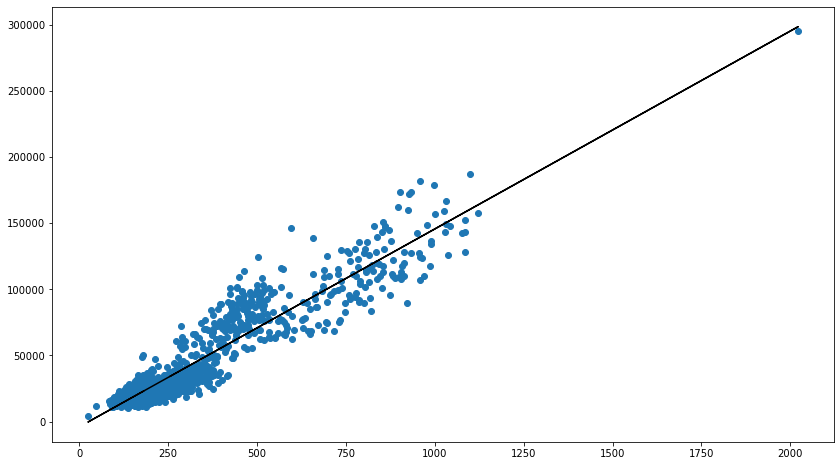

In [203]:
# Ploting a scatterplot to visualize the correlation between distance and cost of trip
fig = plt.figure(figsize=[14,8])
plt.scatter(df10["Profit_y"], df10["Profit_x"])

m, b = np.polyfit(df10["Profit_y"], df10["Profit_x"], 1)
plt.plot(df10["Profit_y"], m*df10["Profit_y"]+b, color="black")

plt.show()

In [204]:
#calculation correlation coefficient and p-value between profit per day and number of rides per day.
pearsonr(df10["Profit_y"], df10["Profit_x"])

(0.9376528493867865, 0.0)

According to the previous analysis, there is a significantly strong correlation between the number of trips and the profit of the company considering every single day from our dataset. The more customers using the service (more transactions), the more profit the companies make.

In [205]:
df

,Transaction ID,Date of Travel,Holiday,Company,KM Travelled,Price Charged,Cost of Trip,Profit,City,User_prop,...,Gender,Age,Income (USD/Month),Payment_Mode,Profit_dist,year,month,day,day_of_week,PriceCharged_km
0,10000011,2016-01-08,No,Pink Cab,30.45,370.95,313.6350,57.3150,ATLANTA GA,0.030312,...,Male,28,10813.0,Card,1.882266,2016,1,8,Friday,12.182266
1,10000397,2016-01-08,No,Yellow Cab,18.90,609.50,267.6240,341.8760,ATLANTA GA,0.030312,...,Male,28,15771.0,Card,18.088677,2016,1,8,Friday,32.248677
2,10000025,2016-01-08,No,Pink Cab,25.52,360.79,298.5840,62.2060,BOSTON MA,0.321411,...,Male,53,4912.0,Cash,2.437539,2016,1,8,Friday,14.137539
3,10000028,2016-01-08,No,Pink Cab,34.22,498.02,407.2180,90.8020,BOSTON MA,0.321411,...,Male,27,21650.0,Cash,2.653477,2016,1,8,Friday,14.553477
4,10000419,2016-01-08,No,Yellow Cab,36.36,703.49,436.3200,267.1700,BOSTON MA,0.321411,...,Male,32,17384.0,Card,7.347910,2016,1,8,Friday,19.347910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10035931,2016-05-18,No,Yellow Cab,42.55,668.78,520.8120,147.9680,WASHINGTON DC,0.303207,...,Female,34,23795.0,Cash,3.477509,2016,5,18,Wednesday,15.717509
359388,10035935,2016-05-18,No,Yellow Cab,4.24,71.35,55.4592,15.8908,WASHINGTON DC,0.303207,...,Female,19,19389.0,Card,3.747830,2016,5,18,Wednesday,16.827830
359389,10035980,2016-05-18,No,Yellow Cab,4.68,69.84,60.0912,9.7488,WASHINGTON DC,0.303207,...,Female,32,31058.0,Cash,2.083077,2016,5,18,Wednesday,14.923077
359390,10035990,2016-05-18,No,Yellow Cab,18.90,288.06,231.3360,56.7240,WASHINGTON DC,0.303207,...,Male,23,22554.0,Cash,3.001270,2016,5,18,Wednesday,15.241270
